In [67]:
import mediapipe as mp
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from mpl_toolkits.mplot3d import Axes3D

In [68]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

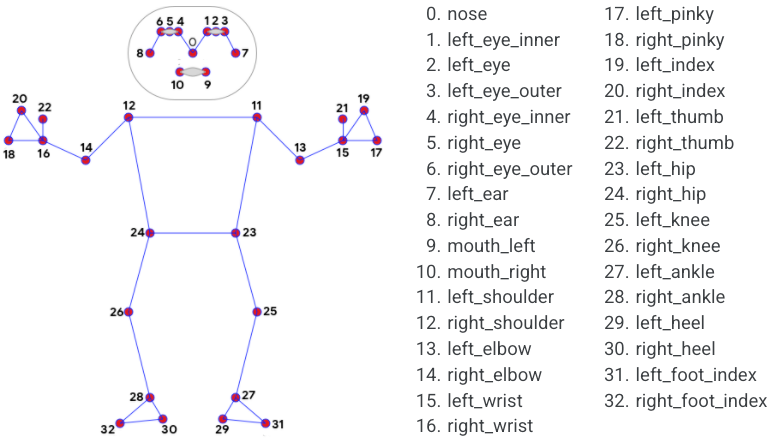

In [69]:
landmark_names = [
        'nose',
        'left_eye_inner',
        'left_eye',
        'left_eye_outer',
        'right_eye_inner',
        'right_eye',
        'right_eye_outer',
        'left_ear',
        'right_ear',
        'mouth_left',
        'mouth_right',
        'left_shoulder',
        'right_shoulder',
        'left_elbow',
        'right_elbow',
        'left_wrist', 'right_wrist',
        'left_pinky_1', 'right_pinky_1',
        'left_index_1', 'right_index_1',
        'left_thumb_2', 'right_thumb_2',
        'left_hip', 'right_hip',
        'left_knee', 'right_knee',
        'left_ankle', 'right_ankle',
        'left_heel', 'right_heel',
        'left_foot_index', 'right_foot_index',
    ]
landmark_list = []
for i in landmark_names:
    for j in ["_x", "_y", "_z"]:
        landmark_list.append(i + j)



In [79]:
results_normalize_points = []
results_real_points = []
#영상
cap = cv2.VideoCapture("test.mp4")
with mp_pose.Pose(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            # print("카메라를 찾을 수 없습니다.")
            break

        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_height, image_width, _ = image.shape
        results = pose.process(image)
        
        #list생성
        normalize_points = []
        for i in range(len(landmark_names)):
            normalize_points.append(results.pose_world_landmarks.landmark[i].x)
            normalize_points.append(results.pose_world_landmarks.landmark[i].y)
            normalize_points.append(results.pose_world_landmarks.landmark[i].z)
        
        real_points = []
        for i in range(len(landmark_names)):
            real_points.append(results.pose_landmarks.landmark[i].x * image_width)
            real_points.append(results.pose_landmarks.landmark[i].y * image_height)
            real_points.append(results.pose_landmarks.landmark[i].z)
        
        results_normalize_points.append(normalize_points)
        results_real_points.append(real_points)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        cv2.imshow('MediaPipe Pose', cv2.flip(image, 1))
        if cv2.waitKey(5) & 0xFF == 27:
            break
cv2.destroyAllWindows
cap.release()




normalize 된 듯?


최대한 비슷하게 나오려면...


사람 나온 곳을 crop해서 사용하면 될 것 같긴 하다.

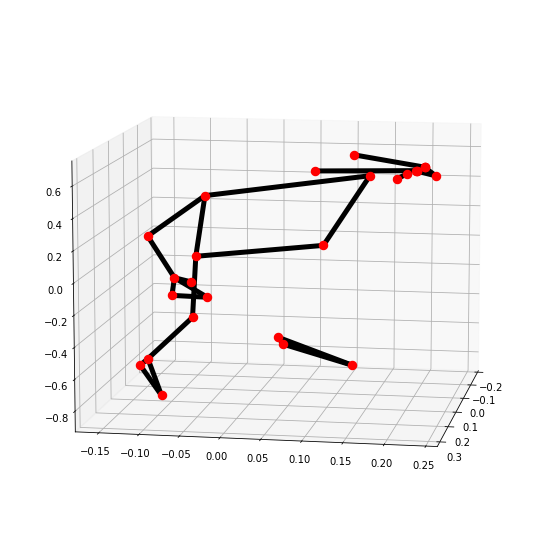

In [80]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [81]:
point_normalize_dataframe = pd.DataFrame(columns = landmark_list, data = results_normalize_points)
point_real_dataframe = pd.DataFrame(columns = landmark_list, data = results_real_points)

In [82]:
point_normalize_dataframe 

nose_x    nose_y    nose_z  left_eye_inner_x  left_eye_inner_y  \
0    0.224792 -0.563316 -0.111109          0.212607         -0.608994   
1    0.232311 -0.562894 -0.109001          0.220880         -0.608216   
2    0.238958 -0.562630 -0.108842          0.228203         -0.607737   
3    0.243110 -0.562556 -0.108822          0.232810         -0.607605   
4    0.249614 -0.562556 -0.110062          0.239768         -0.607592   
..        ...       ...       ...               ...               ...   
581  0.248370 -0.542158 -0.077006          0.237770         -0.587833   
582  0.247195 -0.560675 -0.077938          0.234954         -0.606659   
583  0.237967 -0.566157 -0.079042          0.223741         -0.611308   
584  0.235302 -0.570662 -0.092769          0.220077         -0.616279   
585  0.235608 -0.579246 -0.097252          0.220422         -0.624623   

     left_eye_inner_z  left_eye_x  left_eye_y  left_eye_z  left_eye_outer_x  \
0           -0.099602    0.213137   -0.609219   -0.098880          0.213067   
1           -0.097523    0.221321   -0.608435   -0.096786          0.221214   
2           -0.097382    0.228583   -0.607951   -0.096643          0.228457   
3           -0.097349    0.233179   -0.607818   -0.096609          0.233045   
4           -0.098427    0.240128   -0.607806   -0.097682          0.239983   
..                ...         ...         ...         ...               ...   
581         -0.068348    0.237936   -0.587911   -0.067676          0.237966   
582         -0.068878    0.235136   -0.606771   -0.068191          0.235138   
583         -0.069756    0.223930   -0.611390   -0.069050          0.223895   
584         -0.082679    0.220323   -0.616396   -0.081946          0.220218   
585         -0.085970    0.220688   -0.624776   -0.085196          0.220570   

     ...  left_heel_z  right_heel_x  right_heel_y  right_heel_z  \
0    ...     0.111239      0.001655      0.788325     -0.007692   
1    ...     0.123500     -0.001511      0.780250      0.012913   
2    ...     0.123127     -0.002351      0.778779      0.015718   
3    ...     0.122784     -0.003796      0.778053      0.020867   
4    ...     0.125054     -0.003632      0.775524      0.029153   
..   ...          ...           ...           ...           ...   
581  ...     0.074452     -0.142362      0.705050     -0.094596   
582  ...     0.069175     -0.149981      0.706503     -0.075059   
583  ...     0.067691     -0.141145      0.711027     -0.051837   
584  ...     0.141195     -0.147067      0.745485     -0.018722   
585  ...     0.175059     -0.151094      0.748645     -0.045327   

     left_foot_index_x  left_foot_index_y  left_foot_index_z  \
0             0.130864           0.829971           0.036747   
1             0.119206           0.821935           0.043641   
2             0.106808           0.816722           0.043418   
3             0.108776           0.816137           0.042404   
4             0.109614           0.814751           0.043183   
..                 ...                ...                ...   
581           0.099751           0.728946          -0.003447   
582           0.100670           0.732613          -0.013353   
583           0.062350           0.755437          -0.019036   
584           0.075168           0.797793           0.058365   
585           0.107887           0.822894           0.096683   

     right_foot_index_x  right_foot_index_y  right_foot_index_z  
0              0.072739            0.825114           -0.118176  
1              0.074793            0.820848           -0.102222  
2              0.075714            0.818343           -0.100865  
3              0.074714            0.818385           -0.096961  
4              0.074757            0.816387           -0.088541  
..                  ...                 ...                 ...  
581           -0.081234            0.746538           -0.211090  
582           -0.100466            0.749224           -0.196974  
583          

In [83]:
point_normalize_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 99 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nose_x              586 non-null    float64
 1   nose_y              586 non-null    float64
 2   nose_z              586 non-null    float64
 3   left_eye_inner_x    586 non-null    float64
 4   left_eye_inner_y    586 non-null    float64
 5   left_eye_inner_z    586 non-null    float64
 6   left_eye_x          586 non-null    float64
 7   left_eye_y          586 non-null    float64
 8   left_eye_z          586 non-null    float64
 9   left_eye_outer_x    586 non-null    float64
 10  left_eye_outer_y    586 non-null    float64
 11  left_eye_outer_z    586 non-null    float64
 12  right_eye_inner_x   586 non-null    float64
 13  right_eye_inner_y   586 non-null    float64
 14  right_eye_inner_z   586 non-null    float64
 15  right_eye_x         586 non-null    float64
 16  right_ey

In [84]:
point_normalize_dataframe 

nose_x    nose_y    nose_z  left_eye_inner_x  left_eye_inner_y  \
0    0.224792 -0.563316 -0.111109          0.212607         -0.608994   
1    0.232311 -0.562894 -0.109001          0.220880         -0.608216   
2    0.238958 -0.562630 -0.108842          0.228203         -0.607737   
3    0.243110 -0.562556 -0.108822          0.232810         -0.607605   
4    0.249614 -0.562556 -0.110062          0.239768         -0.607592   
..        ...       ...       ...               ...               ...   
581  0.248370 -0.542158 -0.077006          0.237770         -0.587833   
582  0.247195 -0.560675 -0.077938          0.234954         -0.606659   
583  0.237967 -0.566157 -0.079042          0.223741         -0.611308   
584  0.235302 -0.570662 -0.092769          0.220077         -0.616279   
585  0.235608 -0.579246 -0.097252          0.220422         -0.624623   

     left_eye_inner_z  left_eye_x  left_eye_y  left_eye_z  left_eye_outer_x  \
0           -0.099602    0.213137   -0.609219   -0.098880          0.213067   
1           -0.097523    0.221321   -0.608435   -0.096786          0.221214   
2           -0.097382    0.228583   -0.607951   -0.096643          0.228457   
3           -0.097349    0.233179   -0.607818   -0.096609          0.233045   
4           -0.098427    0.240128   -0.607806   -0.097682          0.239983   
..                ...         ...         ...         ...               ...   
581         -0.068348    0.237936   -0.587911   -0.067676          0.237966   
582         -0.068878    0.235136   -0.606771   -0.068191          0.235138   
583         -0.069756    0.223930   -0.611390   -0.069050          0.223895   
584         -0.082679    0.220323   -0.616396   -0.081946          0.220218   
585         -0.085970    0.220688   -0.624776   -0.085196          0.220570   

     ...  left_heel_z  right_heel_x  right_heel_y  right_heel_z  \
0    ...     0.111239      0.001655      0.788325     -0.007692   
1    ...     0.123500     -0.001511      0.780250      0.012913   
2    ...     0.123127     -0.002351      0.778779      0.015718   
3    ...     0.122784     -0.003796      0.778053      0.020867   
4    ...     0.125054     -0.003632      0.775524      0.029153   
..   ...          ...           ...           ...           ...   
581  ...     0.074452     -0.142362      0.705050     -0.094596   
582  ...     0.069175     -0.149981      0.706503     -0.075059   
583  ...     0.067691     -0.141145      0.711027     -0.051837   
584  ...     0.141195     -0.147067      0.745485     -0.018722   
585  ...     0.175059     -0.151094      0.748645     -0.045327   

     left_foot_index_x  left_foot_index_y  left_foot_index_z  \
0             0.130864           0.829971           0.036747   
1             0.119206           0.821935           0.043641   
2             0.106808           0.816722           0.043418   
3             0.108776           0.816137           0.042404   
4             0.109614           0.814751           0.043183   
..                 ...                ...                ...   
581           0.099751           0.728946          -0.003447   
582           0.100670           0.732613          -0.013353   
583           0.062350           0.755437          -0.019036   
584           0.075168           0.797793           0.058365   
585           0.107887           0.822894           0.096683   

     right_foot_index_x  right_foot_index_y  right_foot_index_z  
0              0.072739            0.825114           -0.118176  
1              0.074793            0.820848           -0.102222  
2              0.075714            0.818343           -0.100865  
3              0.074714            0.818385           -0.096961  
4              0.074757            0.816387           -0.088541  
..                  ...                 ...                 ...  
581           -0.081234            0.746538           -0.211090  
582           -0.100466            0.749224           -0.196974  
583          

In [85]:
point_real_dataframe

nose_x     nose_y    nose_z  left_eye_inner_x  left_eye_inner_y  \
0    212.878418  43.629946 -0.124098        213.058126         37.616211   
1    212.822288  43.733810 -0.122265        213.059074         37.653293   
2    212.793821  43.787422 -0.122634        213.067746         37.666787   
3    212.792999  43.787121 -0.123684        213.093477         37.661937   
4    212.807930  43.745826 -0.129937        213.150859         37.583942   
..          ...        ...       ...               ...               ...   
581  476.070392  46.979674 -0.123555        475.021648         39.119026   
582  477.120173  46.150453 -0.112423        476.218164         38.584996   
583  476.018965  46.350621 -0.112302        475.339794         38.651817   
584  476.260829  45.324456 -0.123916        475.806069         38.447208   
585  477.445436  43.123073 -0.123379        476.557696         36.746196   

     left_eye_inner_z  left_eye_x  left_eye_y  left_eye_z  left_eye_outer_x  \
0           -0.106702  213.325506   37.978073   -0.106721        213.541156   
1           -0.104944  213.332516   37.998576   -0.104969        213.564831   
2           -0.105414  213.351434   38.006363   -0.105440        213.602436   
3           -0.106411  213.390809   37.998694   -0.106439        213.663125   
4           -0.112249  213.458920   37.907700   -0.112279        213.747025   
..                ...         ...         ...         ...               ...   
581         -0.106791  474.216950   38.722142   -0.106836        473.249674   
582         -0.094034  475.581837   38.329727   -0.094078        474.813795   
583         -0.094650  474.745524   38.419949   -0.094696        474.035418   
584         -0.107823  475.383031   38.308457   -0.107857        474.840117   
585         -0.106440  476.275706   36.838172   -0.106480        475.871015   

     ...  left_heel_z  right_heel_x  right_heel_y  right_heel_z  \
0    ...     0.152576    156.351489    316.820555     -0.012270   
1    ...     0.171906    155.406654    316.756074      0.032851   
2    ...     0.170170    155.281591    316.721399      0.027240   
3    ...     0.169070    154.848665    316.720862      0.032802   
4    ...     0.180933    154.819769    316.721957      0.042697   
..   ...          ...           ...           ...           ...   
581  ...     0.121349    393.092036    321.863580     -0.101389   
582  ...     0.098943    393.108988    322.254946     -0.095317   
583  ...     0.103126    395.534635    321.355934     -0.067621   
584  ...     0.205096    395.078051    320.331502     -0.021139   
585  ...     0.236078    394.926488    318.418765     -0.104430   

     left_foot_index_x  left_foot_index_y  left_foot_index_z  \
0           192.776710         318.611734           0.066828   
1           192.285401         318.362203           0.081727   
2           189.953828         318.359070           0.079242   
3           189.982635         318.369198           0.077681   
4           189.975518         318.451874           0.087181   
..                 ...                ...                ...   
581         448.600245         317.503059           0.026046   
582         449.590015         318.063877          -0.009449   
583         447.551644         324.680822          -0.005165   
584         450.472426         324.377646           0.112966   
585         457.992232         323.876588           0.144906   

     right_foot_index_x  right_foot_index_y  right_foot_index_z  
0            182.247591          318.261867           -0.126674  
1            184.105450          318.279998           -0.083208  
2            184.696591          318.349907           -0.091454  
3            183.264220          326.565793           -0.087423  
4            182.466620          328.623970           -0.078201  
..                  ...                 ...                 ...  
581          415.956652          334.974003           -0.225091  
582          413.470781          335.003207  

<ipython-input-86-f47c8639a873>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


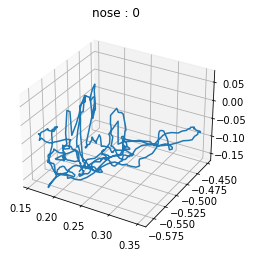

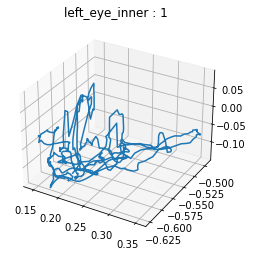

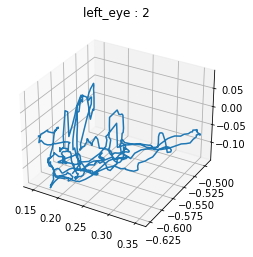

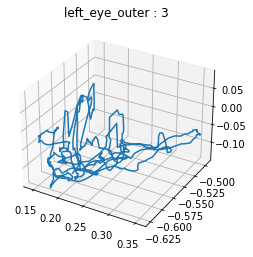

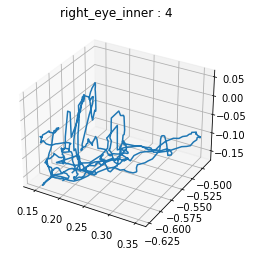

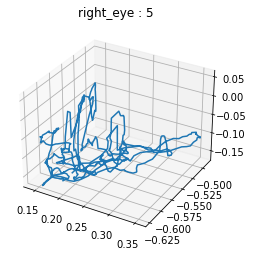

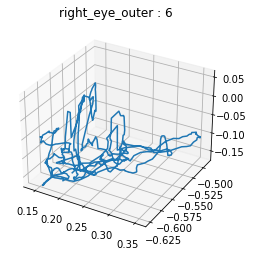

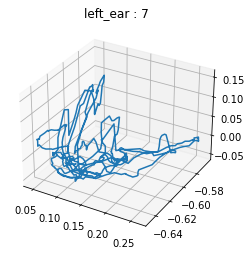

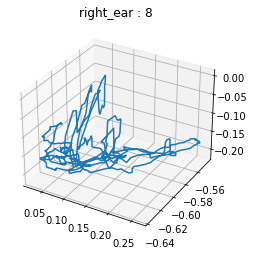

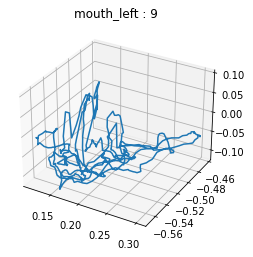

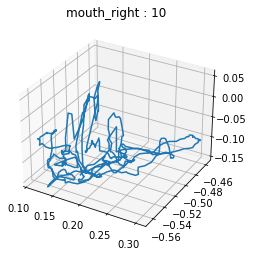

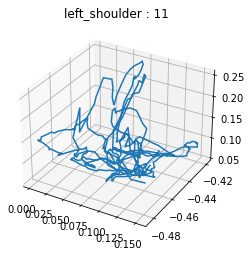

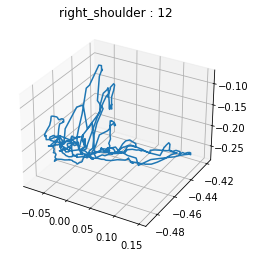

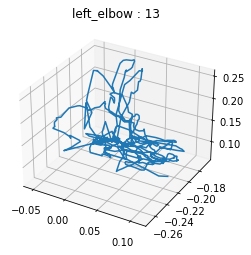

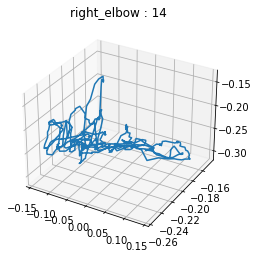

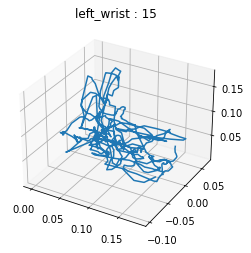

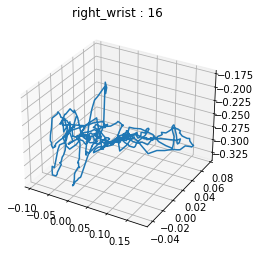

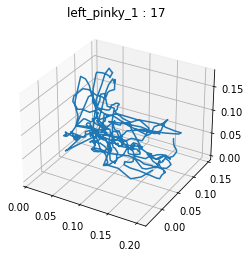

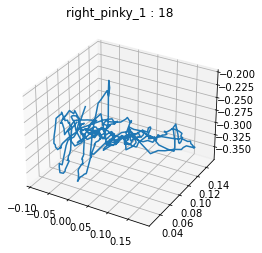

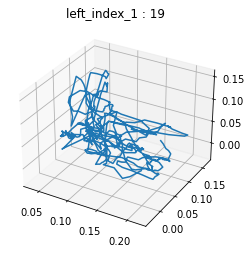

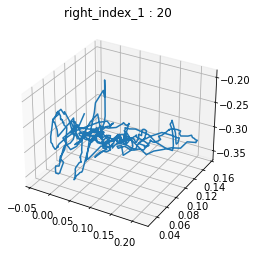

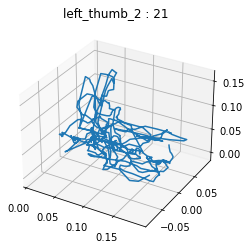

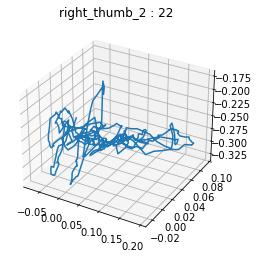

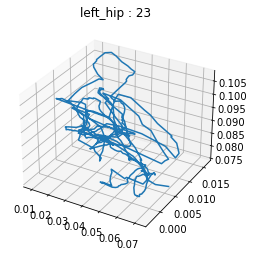

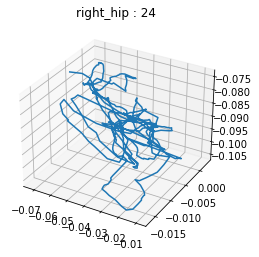

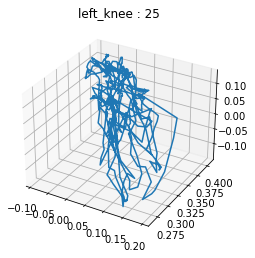

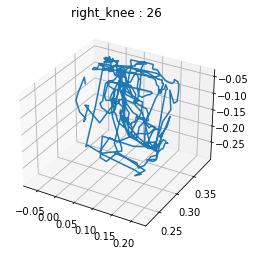

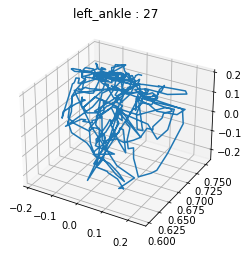

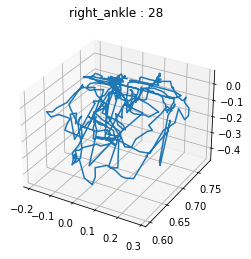

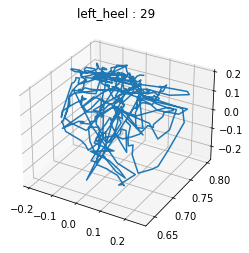

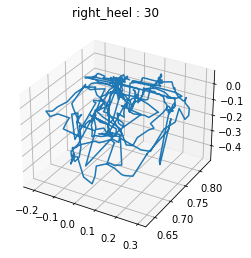

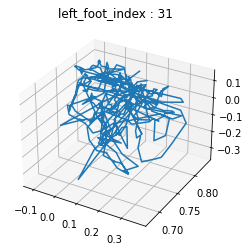

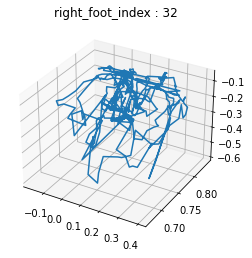

In [86]:
for i in range(len(landmark_names)):
    fig = plt.figure()
    
    ax_1 = plt.axes(projection='3d')
    plt.title(landmark_names[i] + " : " + str(i))
    x = point_normalize_dataframe[landmark_list[i*3]] 
    y = point_normalize_dataframe[landmark_list[i*3+1]]
    z = point_normalize_dataframe[landmark_list[i*3+2]]
    ax_1.plot(x,y,z)


   

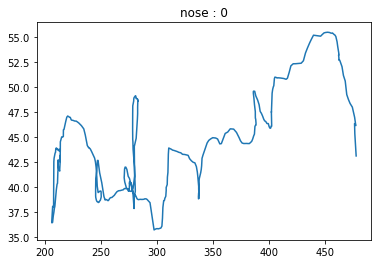

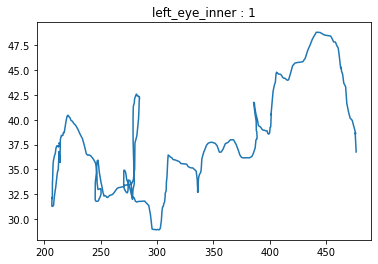

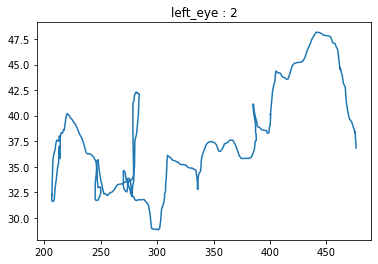

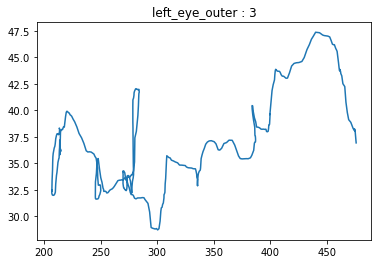

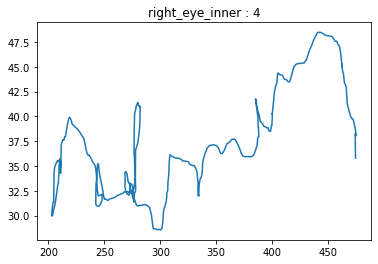

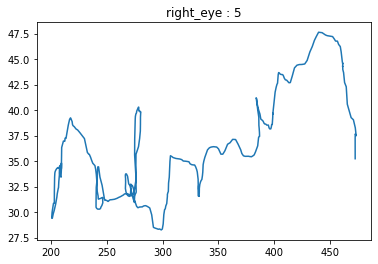

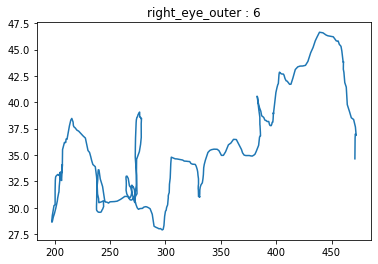

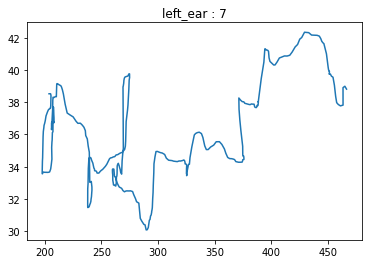

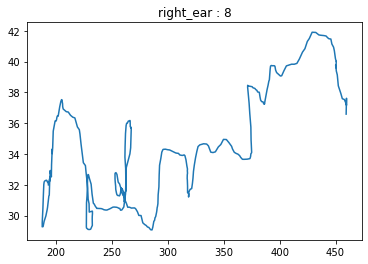

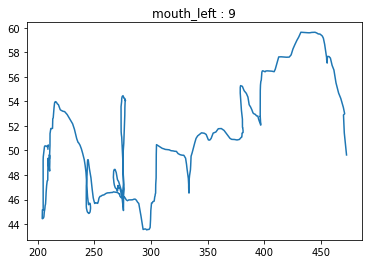

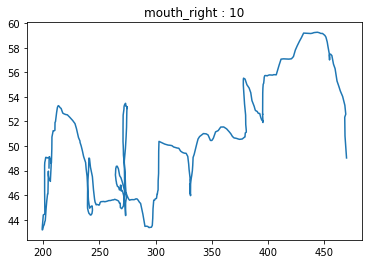

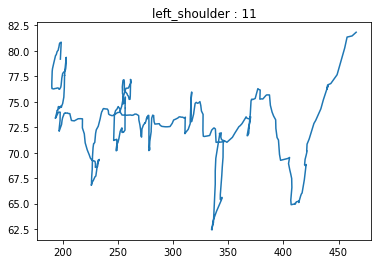

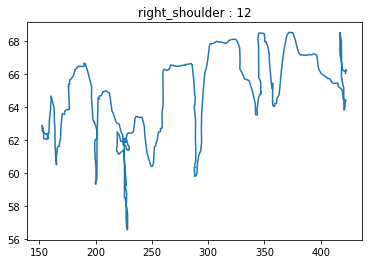

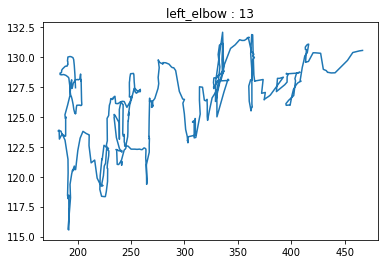

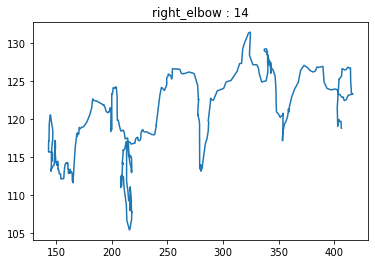

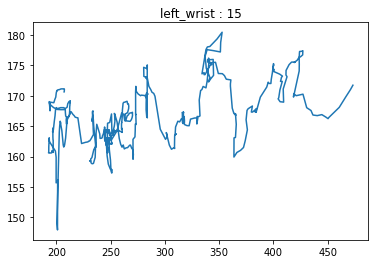

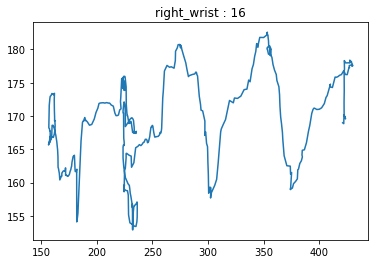

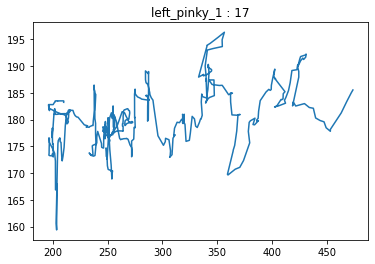

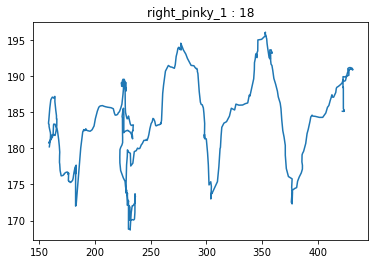

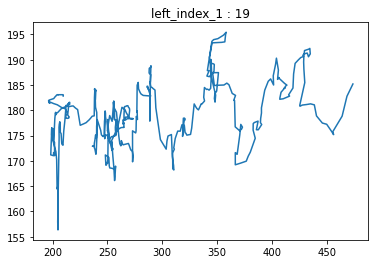

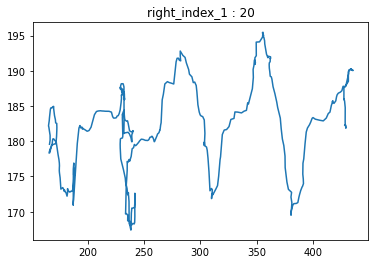

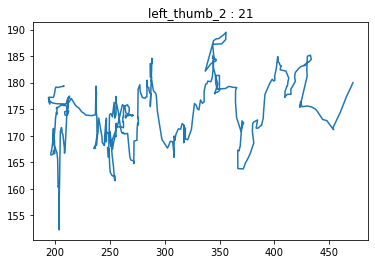

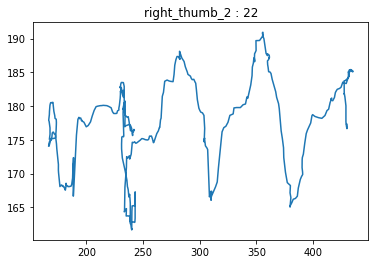

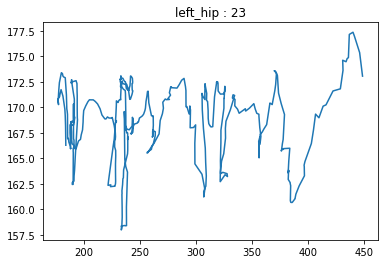

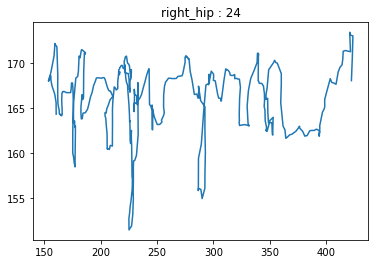

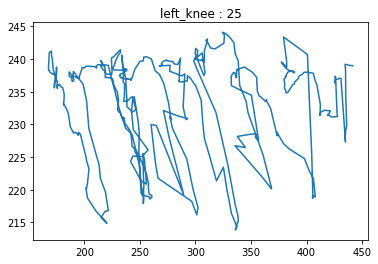

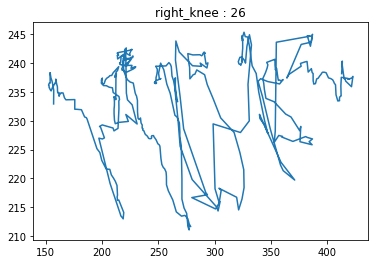

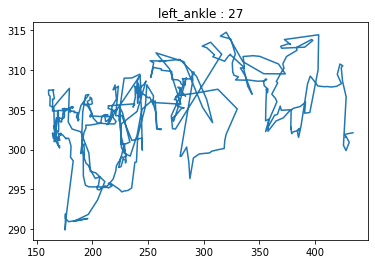

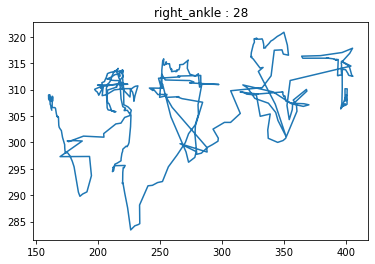

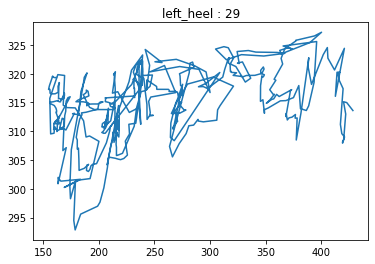

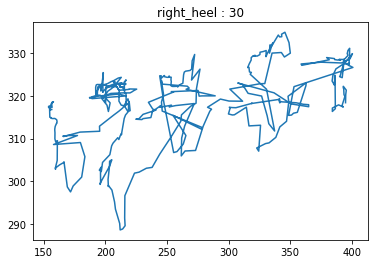

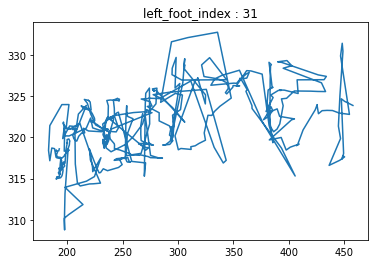

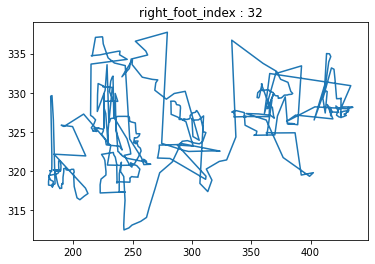

In [87]:
for i in range(len(landmark_names)):

    plt.title(landmark_names[i] + " : " + str(i))
    x = point_real_dataframe[landmark_list[i*3]] 
    y = point_real_dataframe[landmark_list[i*3+1]]

    plt.plot(x,y)
    plt.show()

In [12]:
point_normalize_dataframe.to_csv("point_normalize.csv", mode = 'w', index = False)
point_real_dataframe.to_csv("point_real.csv", mode = 'w', index = False)

## Hemiplegic Gait 
* https://www.youtube.com/watch?v=ihz74Zv6D84
* https://www.youtube.com/watch?v=y160w4sAQNw&list=PLD74972DCFB2D58C8

## Diplegic Gait
* https://www.youtube.com/watch?v=eLuxTFHoZAA&list=PLD74972DCFB2D58C8&index=2
* 

In [9]:
point_normalize_dataframe

nose_x    nose_y    nose_z  left_eye_inner_x  left_eye_inner_y  \
0    0.189573 -0.597068 -0.163225          0.164992         -0.641987   
1    0.193588 -0.603334 -0.149474          0.167534         -0.646749   
2    0.211302 -0.615537 -0.139884          0.186049         -0.658645   
3    0.217025 -0.623345 -0.139500          0.192396         -0.666512   
4    0.217587 -0.621558 -0.133263          0.193579         -0.664917   
..        ...       ...       ...               ...               ...   
134  0.172675 -0.603860 -0.098230          0.157629         -0.645690   
135  0.172800 -0.604111 -0.100596          0.157548         -0.645890   
136  0.172851 -0.603654 -0.103807          0.157453         -0.645369   
137  0.172274 -0.601551 -0.108398          0.156698         -0.643332   
138  0.172375 -0.599843 -0.110666          0.156682         -0.641646   

     left_eye_inner_z  left_eye_x  left_eye_y  left_eye_z  left_eye_outer_x  \
0           -0.153325    0.165396   -0.642102   -0.152595          0.165288   
1           -0.137942    0.167917   -0.646882   -0.137253          0.167712   
2           -0.128379    0.186389   -0.658804   -0.127688          0.186094   
3           -0.128613    0.192676   -0.666626   -0.127903          0.192430   
4           -0.123402    0.193843   -0.665022   -0.122657          0.193650   
..                ...         ...         ...         ...               ...   
134         -0.085949    0.157888   -0.645668   -0.085247          0.157707   
135         -0.088546    0.157805   -0.645877   -0.087849          0.157620   
136         -0.092017    0.157710   -0.645374   -0.091318          0.157522   
137         -0.096937    0.156964   -0.643359   -0.096241          0.156786   
138         -0.099078    0.156951   -0.641688   -0.098388          0.156774   

     ...  left_heel_z  right_heel_x  right_heel_y  right_heel_z  \
0    ...     0.219943     -0.074937      0.806014      0.040866   
1    ...     0.205442     -0.085021      0.802507      0.035435   
2    ...     0.213280     -0.098092      0.792451      0.047457   
3    ...     0.213796     -0.129218      0.782278      0.070536   
4    ...     0.213007     -0.149983      0.771653      0.102458   
..   ...          ...           ...           ...           ...   
134  ...     0.252255     -0.020252      0.797077      0.084293   
135  ...     0.253856     -0.019843      0.797681      0.083454   
136  ...     0.252636     -0.020226      0.800890      0.083016   
137  ...     0.249989     -0.020457      0.802043      0.076922   
138  ...     0.245136     -0.020192      0.805493      0.065324   

     left_foot_index_x  left_foot_index_y  left_foot_index_z  \
0             0.054205           0.828724           0.167491   
1             0.042096           0.823012           0.151791   
2             0.034728           0.805992           0.166923   
3             0.084782           0.796275           0.167291   
4             0.119917           0.781949           0.166544   
..                 ...                ...                ...   
134           0.047086           0.842310           0.200128   
135           0.046662           0.837415           0.203124   
136           0.044516           0.837369           0.202032   
137           0.044526           0.836991           0.199022   
138           0.044384           0.837431           0.193021   

     right_foot_index_x  right_foot_index_y  right_foot_index_z  
0              0.042717            0.835529           -0.055435  
1              0.023676            0.831995           -0.059656  
2              0.011385            0.824457           -0.049063  
3             -0.022285            0.816900           -0.034294  
4             -0.048812            0.805134            0.001875  
..                  ...                 ...                 ...  
134            0.080760            0.829856            0.010952  
135            0.081989            0.829422            0.009869  
136          

In [12]:
side_view = point_normalize_dataframe.loc[138]

In [15]:
side_view

nose_x                0.172375
nose_y               -0.599843
nose_z               -0.110666
left_eye_inner_x      0.156682
left_eye_inner_y     -0.641646
                        ...   
left_foot_index_y     0.837431
left_foot_index_z     0.193021
right_foot_index_x    0.082975
right_foot_index_y    0.833669
right_foot_index_z   -0.017390
Name: 138, Length: 99, dtype: float64

In [56]:
nose = 0
left_eye = 2
right_eye = 5
left_ear = 7
right_ear = 8
left_shoulder = 11
right_shoulder = 12


[1.8957307934761047, -1.6322475671768188, -1.5332522988319397, -6.4210182428359985, -1.5332522988319397, -1.525120586156845, 1.608230471611023]
[-1.6322475671768188, -6.4198726415634155, -6.4210182428359985, 1.65287584066391, -6.4210182428359985, -6.33557915687561, -1.8632619082927704]


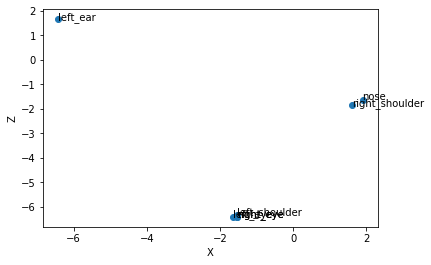

[1.9358792901039124, -1.4947374165058136, -1.3794159889221191, -6.46881639957428, -1.3794159889221191, -1.3713523745536804, 1.6386744379997253]
[-1.4947374165058136, -6.467494368553162, -6.46881639957428, 1.6771163046360016, -6.46881639957428, -6.374428868293762, -1.7183893918991089]


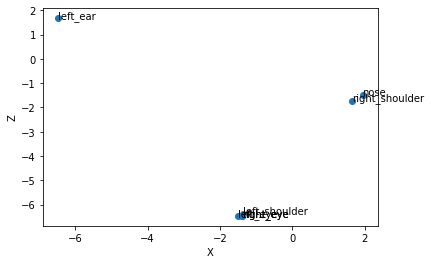

[2.113019973039627, -1.3988421857357025, -1.2837915122509003, -6.588042974472046, -1.2837915122509003, -1.2752339243888855, 1.8293221294879913]
[-1.3988421857357025, -6.5864527225494385, -6.588042974472046, 1.8609361350536346, -6.588042974472046, -6.4929282665252686, -1.6239005327224731]


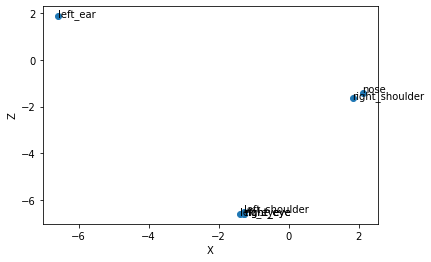

[2.1702486276626587, -1.3949984312057495, -1.2861329317092896, -6.666257977485657, -1.2861329317092896, -1.277579516172409, 1.8880942463874817]
[-1.3949984312057495, -6.665117144584656, -6.666257977485657, 1.9242994487285614, -6.666257977485657, -6.574733853340149, -1.6207602620124817]


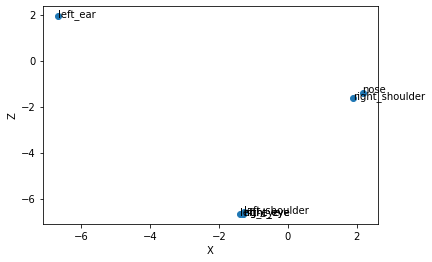

[2.175871580839157, -1.332625150680542, -1.2340180575847626, -6.650219559669495, -1.2340180575847626, -1.2258324772119522, 1.9136562943458557]
[-1.332625150680542, -6.649172902107239, -6.650219559669495, 1.9365037977695465, -6.650219559669495, -6.559931635856628, -1.563478410243988]


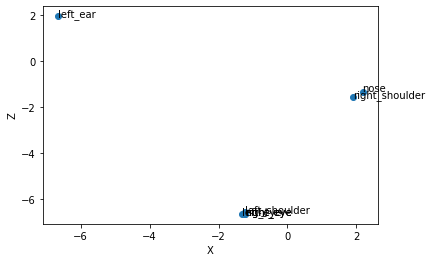

[2.307625710964203, -1.2456710636615753, -1.1525297164916992, -6.59770667552948, -1.1525297164916992, -1.1442599445581436, 2.101055383682251]
[-1.2456710636615753, -6.596652865409851, -6.59770667552948, 2.1139445900917053, -6.59770667552948, -6.511576175689697, -1.473240703344345]


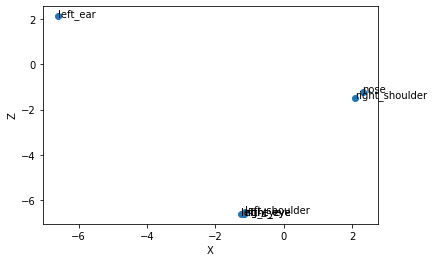

[2.3856084048748016, -0.9714793413877487, -0.8789573609828949, -6.548104286193848, -0.8789573609828949, -0.869518518447876, 2.227337807416916]
[-0.9714793413877487, -6.546692252159119, -6.548104286193848, 2.219916433095932, -6.548104286193848, -6.464667916297913, -1.188100129365921]


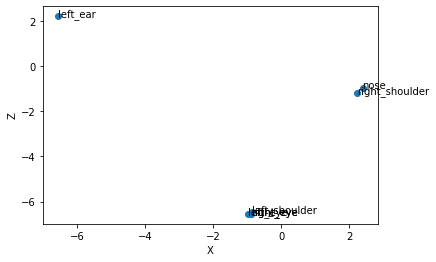

[2.4191978573799133, -1.2151429802179337, -1.1146452277898788, -6.376467347145081, -1.1146452277898788, -1.1018671840429306, 2.2694937884807587]
[-1.2151429802179337, -6.374659538269043, -6.376467347145081, 2.256307750940323, -6.376467347145081, -6.283044219017029, -1.411052644252777]


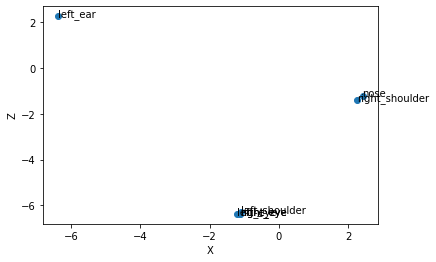

[2.5281015038490295, -1.5012802183628082, -1.3953477144241333, -6.3116902112960815, -1.3953477144241333, -1.380312591791153, 2.3740023374557495]
[-1.5012802183628082, -6.309782266616821, -6.3116902112960815, 2.357318252325058, -6.3116902112960815, -6.216520071029663, -1.6945362091064453]


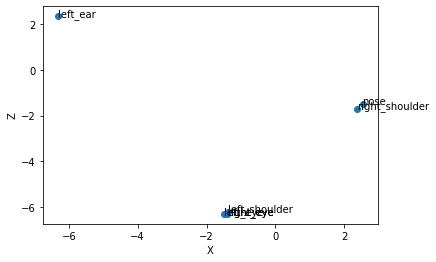

[2.63913094997406, -1.5097427368164062, -1.4005813002586365, -6.2686216831207275, -1.4005813002586365, -1.3856783509254456, 2.4903281033039093]
[-1.5097427368164062, -6.266618967056274, -6.2686216831207275, 2.471168041229248, -6.2686216831207275, -6.1712270975112915, -1.702038049697876]


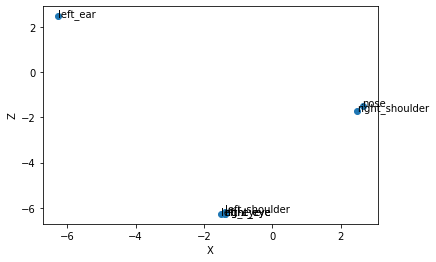

[2.707161009311676, -1.2895186245441437, -1.1677790433168411, -6.261609792709351, -1.1677790433168411, -1.152040958404541, 2.5542840361595154]
[-1.2895186245441437, -6.259612441062927, -6.261609792709351, 2.5381839275360107, -6.261609792709351, -6.16377055644989, -1.4786727726459503]


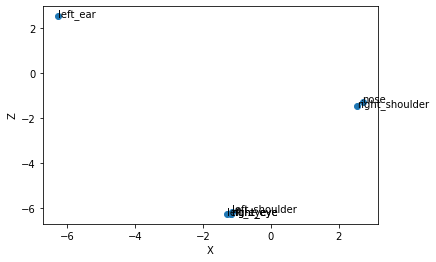

[2.841784358024597, -0.9445344656705856, -0.8216813206672668, -6.2530165910720825, -0.8216813206672668, -0.8066386729478836, 2.693740725517273]
[-0.9445344656705856, -6.251274943351746, -6.2530165910720825, 2.6696258783340454, -6.2530165910720825, -6.1536455154418945, -1.1415667086839676]


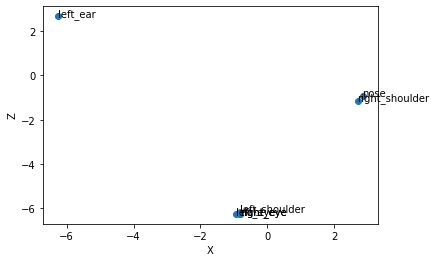

[2.860042452812195, -0.6246744096279144, -0.5029222369194031, -6.252456307411194, -0.5029222369194031, -0.48824455589056015, 2.712682783603668]
[-0.6246744096279144, -6.250926852226257, -6.252456307411194, 2.68673837184906, -6.252456307411194, -6.153555512428284, -0.8186011761426926]


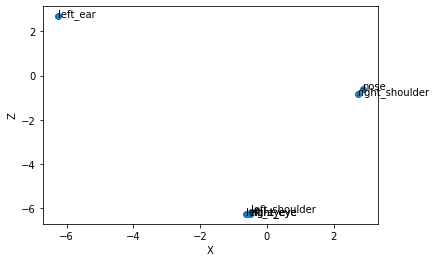

[2.8504398465156555, -0.48478055745363235, -0.36948878318071365, -6.263163685798645, -0.36948878318071365, -0.3553415834903717, 2.685263752937317]
[-0.48478055745363235, -6.261852383613586, -6.263163685798645, 2.6588812470436096, -6.263163685798645, -6.159756779670715, -0.6870200484991074]


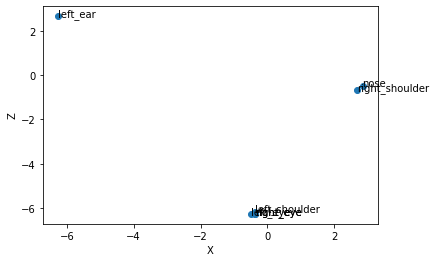

[2.8080952167510986, -0.5783713608980179, -0.45223161578178406, -6.242527365684509, -0.45223161578178406, -0.43952491134405136, 2.6402953267097473]
[-0.5783713608980179, -6.241229772567749, -6.242527365684509, 2.61680006980896, -6.242527365684509, -6.141562461853027, -0.7792814075946808]


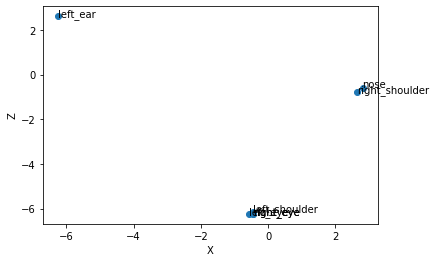

[2.7226707339286804, -1.40854611992836, -1.3011090457439423, -6.1516594886779785, -1.3011090457439423, -1.2869176268577576, 2.568480372428894]
[-1.40854611992836, -6.150274276733398, -6.1516594886779785, 2.5568220019340515, -6.1516594886779785, -6.057860255241394, -1.6058443486690521]


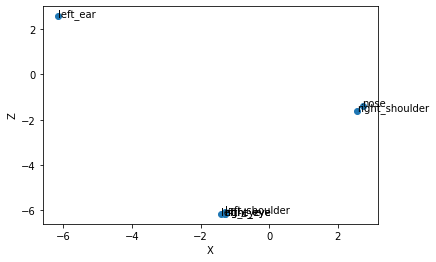

[2.6020142436027527, -1.419348120689392, -1.3143877685070038, -6.051257848739624, -1.3143877685070038, -1.3016828894615173, 2.4733489751815796]
[-1.419348120689392, -6.049508452415466, -6.051257848739624, 2.4679867923259735, -6.051257848739624, -5.958380699157715, -1.6245895624160767]


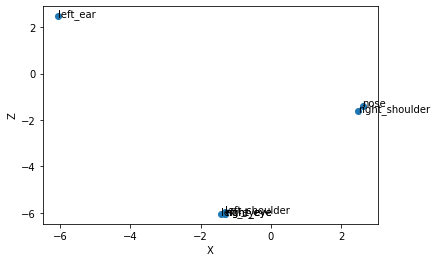

[2.6078009605407715, -1.2696081399917603, -1.182417944073677, -6.114845871925354, -1.182417944073677, -1.174219697713852, 2.4733631312847137]
[-1.2696081399917603, -6.113879084587097, -6.114845871925354, 2.475014179944992, -6.114845871925354, -6.026307940483093, -1.4899206161499023]


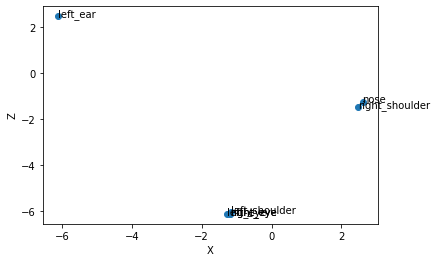

[2.6036128401756287, -1.2592677772045135, -1.1678700894117355, -6.123086214065552, -1.1678700894117355, -1.1589175462722778, 2.4584773182868958]
[-1.2592677772045135, -6.122169494628906, -6.123086214065552, 2.472607344388962, -6.123086214065552, -6.042270660400391, -1.476670503616333]


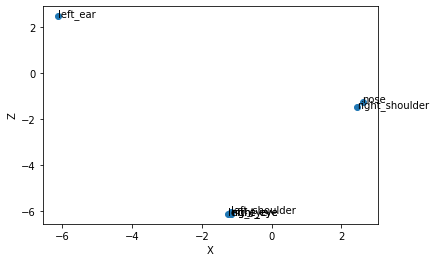

[2.6387235522270203, -1.256759911775589, -1.1626354604959488, -6.257030963897705, -1.1626354604959488, -1.152414157986641, 2.4580825865268707]
[-1.256759911775589, -6.255819201469421, -6.257030963897705, 2.4792997539043427, -6.257030963897705, -6.179736256599426, -1.4697197079658508]


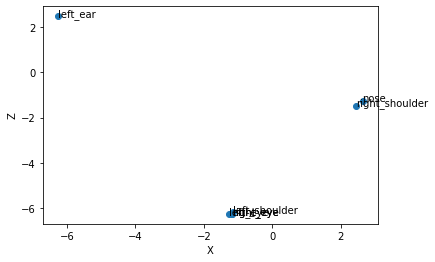

[2.625132203102112, -1.180451437830925, -1.0744929313659668, -6.3673341274261475, -1.0744929313659668, -1.067294329404831, 2.4026012420654297]
[-1.180451437830925, -6.364743113517761, -6.3673341274261475, 2.441912144422531, -6.3673341274261475, -6.285046935081482, -1.3911768794059753]


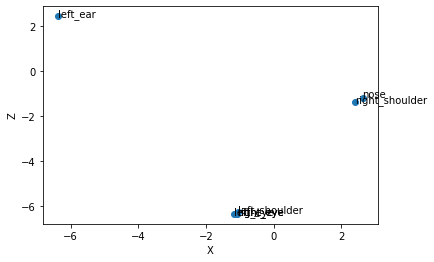

[2.542748749256134, -1.0199669003486633, -0.8861265331506729, -6.363599896430969, -0.8861265331506729, -0.8793977648019791, 2.286289930343628]
[-1.0199669003486633, -6.3610416650772095, -6.363599896430969, 2.3444654047489166, -6.363599896430969, -6.280106902122498, -1.2080570310354233]


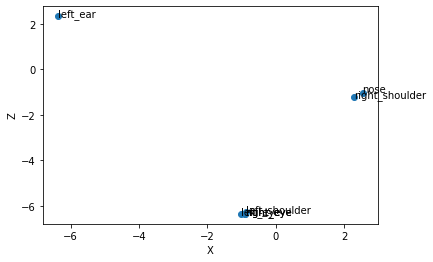

[2.5292059779167175, -1.062907874584198, -0.9169676154851913, -6.41360878944397, -0.9169676154851913, -0.9109108150005341, 2.249169498682022]
[-1.062907874584198, -6.410723924636841, -6.41360878944397, 2.313682734966278, -6.41360878944397, -6.326808929443359, -1.2401620298624039]


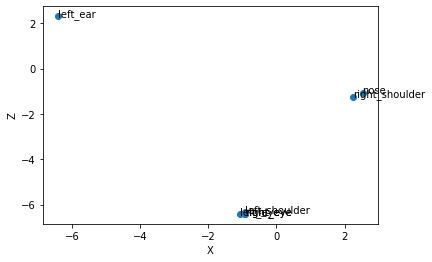

[2.4700789153575897, -1.0520139336585999, -0.9081790596246719, -6.422376036643982, -0.9081790596246719, -0.9012565761804581, 2.1678626537323]
[-1.0520139336585999, -6.419332027435303, -6.422376036643982, 2.2284220159053802, -6.422376036643982, -6.334710121154785, -1.2334972620010376]


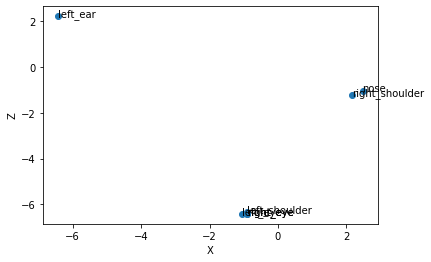

[2.4404895305633545, -0.9839203208684921, -0.8360175788402557, -6.454335451126099, -0.8360175788402557, -0.8281367272138596, 2.1265098452568054]
[-0.9839203208684921, -6.451436281204224, -6.454335451126099, 2.181965559720993, -6.454335451126099, -6.366033554077148, -1.1653224378824234]


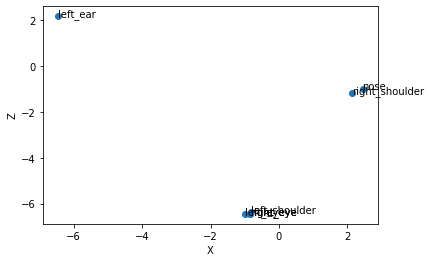

[2.4152465164661407, -0.9442778676748276, -0.7908854633569717, -6.514824032783508, -0.7908854633569717, -0.7827562838792801, 2.087336629629135]
[-0.9442778676748276, -6.512198448181152, -6.514824032783508, 2.139078676700592, -6.514824032783508, -6.4228737354278564, -1.1260268837213516]


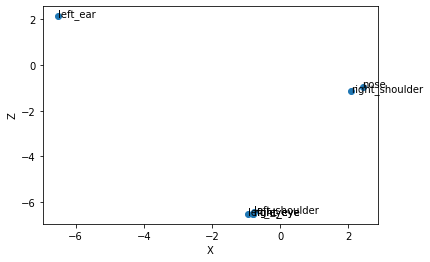

[2.377772480249405, -0.914606973528862, -0.7552051544189453, -6.55961811542511, -0.7552051544189453, -0.7472562044858932, 2.047208845615387]
[-0.914606973528862, -6.557117700576782, -6.55961811542511, 2.0954522490501404, -6.55961811542511, -6.459963917732239, -1.0954664647579193]


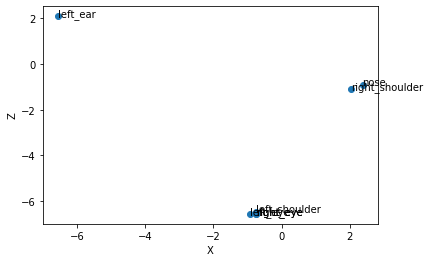

[2.2131070494651794, -0.9416791796684265, -0.7684286683797836, -6.571455597877502, -0.7684286683797836, -0.7611671090126038, 1.8966233730316162]
[-0.9416791796684265, -6.569492816925049, -6.571455597877502, 1.949550211429596, -6.571455597877502, -6.469731330871582, -1.1113487929105759]


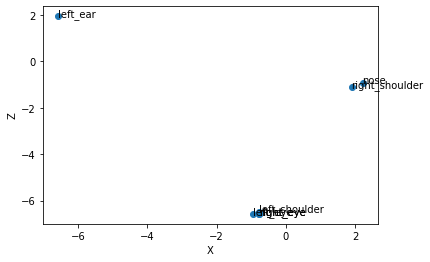

[2.093829959630966, -1.1319174617528915, -0.9732485562562943, -6.5637511014938354, -0.9732485562562943, -0.9673301130533218, 1.8054845929145813]
[-1.1319174617528915, -6.562010645866394, -6.5637511014938354, 1.8630443513393402, -6.5637511014938354, -6.463801264762878, -1.3010814785957336]


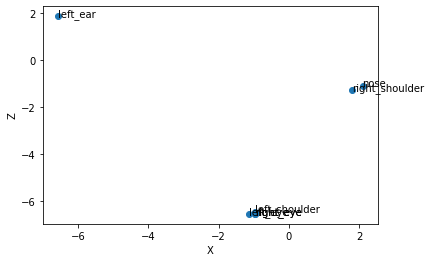

[1.905670017004013, -1.2318312376737595, -1.1010223627090454, -6.5242308378219604, -1.1010223627090454, -1.0940390080213547, 1.671878844499588]
[-1.2318312376737595, -6.52391254901886, -6.5242308378219604, 1.69570654630661, -6.5242308378219604, -6.422533988952637, -1.4286035299301147]


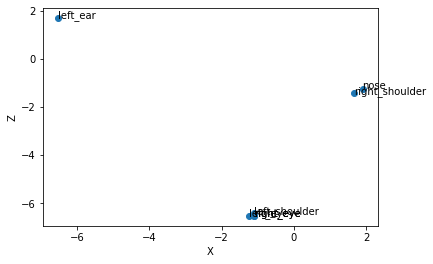

[1.904601901769638, -1.3038977980613708, -1.191481202840805, -6.461500525474548, -1.191481202840805, -1.184898018836975, 1.7029371857643127]
[-1.3038977980613708, -6.4616310596466064, -6.461500525474548, 1.7164169251918793, -6.461500525474548, -6.36737585067749, -1.5162073075771332]


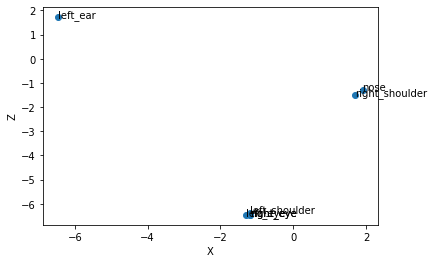

[1.9540847837924957, -1.2799079716205597, -1.187855303287506, -6.474829912185669, -1.187855303287506, -1.1808310449123383, 1.7431409657001495]
[-1.2799079716205597, -6.474963426589966, -6.474829912185669, 1.762535721063614, -6.474829912185669, -6.383500695228577, -1.5103799104690552]


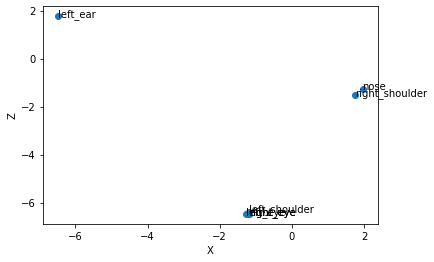

[1.9827376306056976, -1.207965686917305, -1.1023054271936417, -6.4635008573532104, -1.1023054271936417, -1.094604805111885, 1.7563526332378387]
[-1.207965686917305, -6.463645696640015, -6.4635008573532104, 1.7845948040485382, -6.4635008573532104, -6.374009847640991, -1.434808224439621]


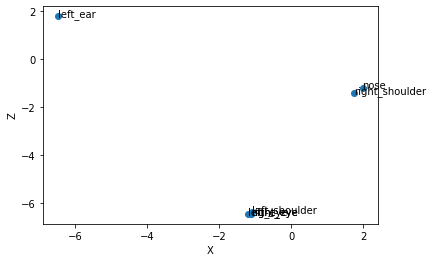

[1.9963374733924866, -1.2031611055135727, -1.097170114517212, -6.438637971878052, -1.097170114517212, -1.090467944741249, 1.79246187210083]
[-1.2031611055135727, -6.438554525375366, -6.438637971878052, 1.7942918837070465, -6.438637971878052, -6.352592706680298, -1.4302870631217957]


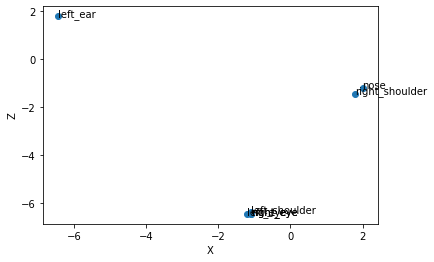

[2.0153144001960754, -1.0697411000728607, -0.977192297577858, -6.438707709312439, -0.977192297577858, -0.9665676951408386, 1.7972564697265625]
[-1.0697411000728607, -6.438606381416321, -6.438707709312439, 1.81252121925354, -6.438707709312439, -6.352989673614502, -1.2957991659641266]


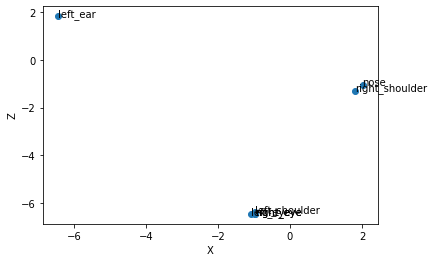

[2.0219674706459045, -0.6408578902482986, -0.534924753010273, -6.440858840942383, -0.534924753010273, -0.5215804278850555, 1.8366910517215729]
[-0.6408578902482986, -6.440683007240295, -6.440858840942383, 1.8192081153392792, -6.440858840942383, -6.354612708091736, -0.8527748286724091]


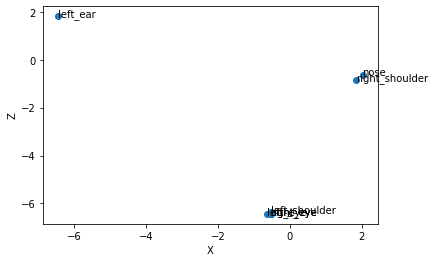

[2.117660790681839, -0.45235905796289444, -0.3357712924480438, -6.44150972366333, -0.3357712924480438, -0.32106585800647736, 1.9657674431800842]
[-0.45235905796289444, -6.441269516944885, -6.44150972366333, 1.9180168211460114, -6.44150972366333, -6.3547128438949585, -0.6485810875892639]


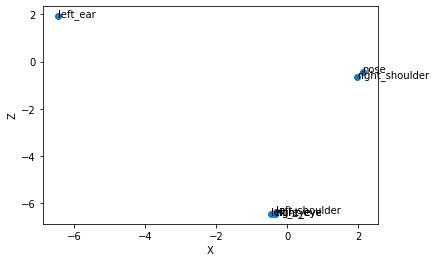

[2.2027482092380524, -0.19250398501753807, -0.07561864797025919, -6.44119918346405, -0.07561864797025919, -0.06030774209648371, 2.062758207321167]
[-0.19250398501753807, -6.440934538841248, -6.44119918346405, 1.9972999393939972, -6.44119918346405, -6.352486610412598, -0.3899454325437546]


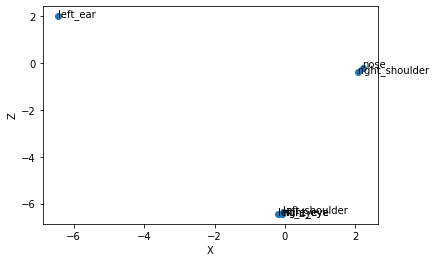

[2.2193406522274017, -0.0894050020724535, 0.029903165996074677, -6.44058883190155, 0.029903165996074677, 0.044791409745812416, 2.081342786550522]
[-0.0894050020724535, -6.4403462409973145, -6.44058883190155, 2.01265886425972, -6.44058883190155, -6.351090669631958, -0.28890006244182587]


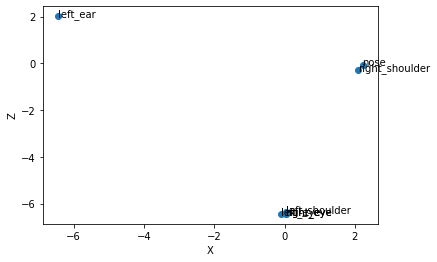

[2.1837249398231506, -0.24866610765457153, -0.127919539809227, -6.431994438171387, -0.127919539809227, -0.11463453993201256, 2.0485103130340576]
[-0.24866610765457153, -6.431719660758972, -6.431994438171387, 1.9750459492206573, -6.431994438171387, -6.341840624809265, -0.4475622996687889]


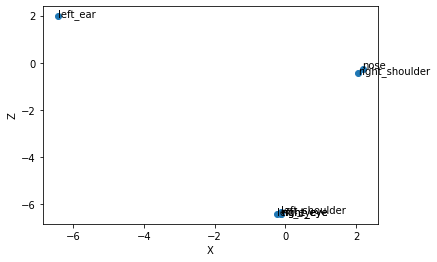

[2.1422500908374786, -0.8822712302207947, -0.796053409576416, -6.367466449737549, -0.796053409576416, -0.7810180634260178, 2.0026233792304993]
[-0.8822712302207947, -6.366778612136841, -6.367466449737549, 1.93438321352005, -6.367466449737549, -6.279285550117493, -1.1049671471118927]


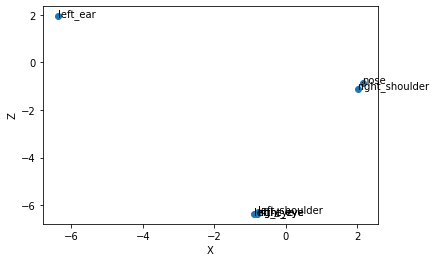

[2.0617488026618958, -1.6655166447162628, -1.5741746127605438, -6.244975924491882, -1.5741746127605438, -1.5592506527900696, 1.897452175617218]
[-1.6655166447162628, -6.243720650672913, -6.244975924491882, 1.8552279472351074, -6.244975924491882, -6.151385307312012, -1.8842831254005432]


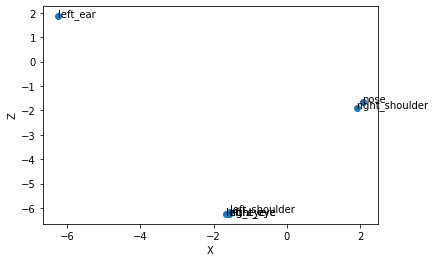

[2.011568397283554, -1.3901105523109436, -1.290156990289688, -6.257002353668213, -1.290156990289688, -1.276112049818039, 1.8382726609706879]
[-1.3901105523109436, -6.2559086084365845, -6.257002353668213, 1.8052250146865845, -6.257002353668213, -6.1641013622283936, -1.6038422286510468]


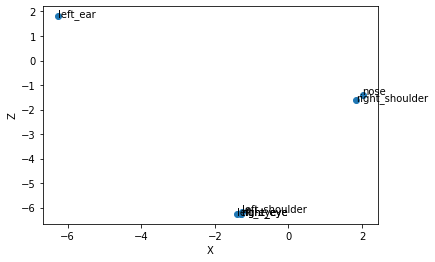

[1.9902031123638153, -1.3035541772842407, -1.1854371428489685, -6.282746195793152, -1.1854371428489685, -1.1688464134931564, 1.818617433309555]
[-1.3035541772842407, -6.281449794769287, -6.282746195793152, 1.8007677793502808, -6.282746195793152, -6.198174357414246, -1.5051227807998657]


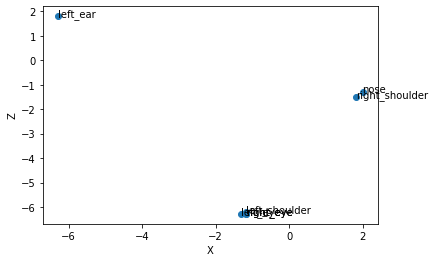

[1.9412072002887726, -1.2351802736520767, -1.121380403637886, -6.2855470180511475, -1.121380403637886, -1.1032453924417496, 1.7694011330604553]
[-1.2351802736520767, -6.284556984901428, -6.2855470180511475, 1.7616136372089386, -6.2855470180511475, -6.206144690513611, -1.4354261755943298]


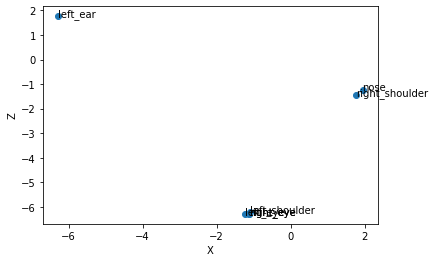

[1.9456233084201813, -1.1782795935869217, -1.0674691945314407, -6.388729810714722, -1.0674691945314407, -1.0515552014112473, 1.772947907447815]
[-1.1782795935869217, -6.386839747428894, -6.388729810714722, 1.7688272893428802, -6.388729810714722, -6.312885284423828, -1.3832339644432068]


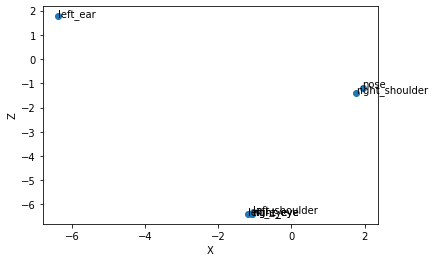

[1.994277536869049, -0.8390583842992783, -0.7082471996545792, -6.481809616088867, -0.7082471996545792, -0.698731318116188, 1.7783528566360474]
[-0.8390583842992783, -6.479191184043884, -6.481809616088867, 1.7773815989494324, -6.481809616088867, -6.3919395208358765, -1.0423623025417328]


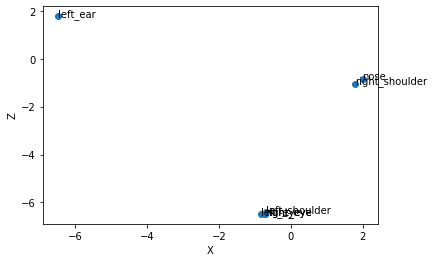

[2.006153017282486, -0.8340560644865036, -0.6961941719055176, -6.491841673851013, -0.6961941719055176, -0.6878305971622467, 1.7839419841766357]
[-0.8340560644865036, -6.489289999008179, -6.491841673851013, 1.784168928861618, -6.491841673851013, -6.400089263916016, -1.0288389027118683]


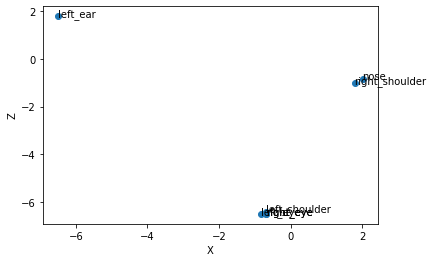

[2.0114725828170776, -0.8810814470052719, -0.7327301800251007, -6.484488248825073, -0.7327301800251007, -0.7253316789865494, 1.7867515981197357]
[-0.8810814470052719, -6.481817364692688, -6.484488248825073, 1.801440715789795, -6.484488248825073, -6.393545866012573, -1.059657260775566]


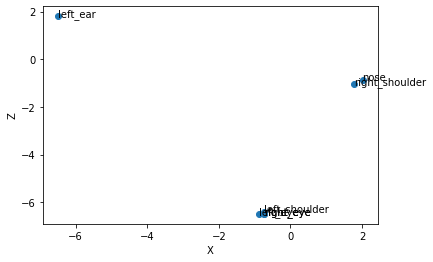

[2.1169334650039673, -0.8768568933010101, -0.7262220233678818, -6.490549445152283, -0.7262220233678818, -0.718572586774826, 1.865895390510559]
[-0.8768568933010101, -6.4878541231155396, -6.490549445152283, 1.9045232236385345, -6.490549445152283, -6.399669647216797, -1.0511569678783417]


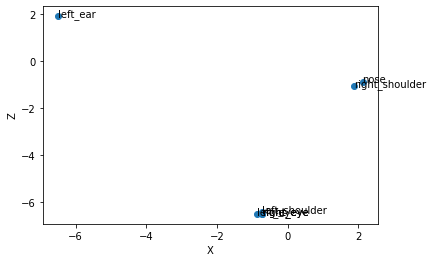

[2.2651605308055878, -0.8190193027257919, -0.6562194973230362, -6.502121686935425, -0.6562194973230362, -0.647963359951973, 1.9976921379566193]
[-0.8190193027257919, -6.4992755651474, -6.502121686935425, 2.043682038784027, -6.502121686935425, -6.4137864112854, -0.9849710017442703]


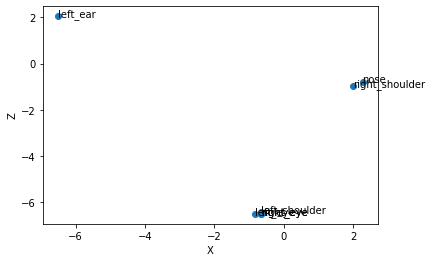

[2.2764162719249725, -0.6828741729259491, -0.5167332291603088, -6.538311839103699, -0.5167332291603088, -0.5075538530945778, 2.0046761631965637]
[-0.6828741729259491, -6.535662412643433, -6.538311839103699, 2.0478789508342743, -6.538311839103699, -6.4510756731033325, -0.8492355048656464]


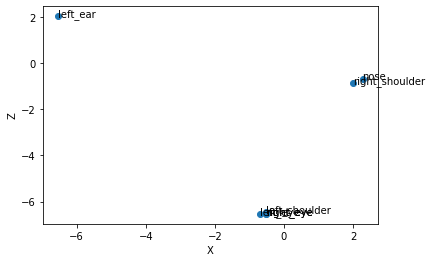

[2.2369270026683807, -0.4561524838209152, -0.2943762019276619, -6.542177200317383, -0.2943762019276619, -0.2858186513185501, 1.9505511224269867]
[-0.4561524838209152, -6.539996862411499, -6.542177200317383, 1.991792619228363, -6.542177200317383, -6.4529114961624146, -0.6342355906963348]


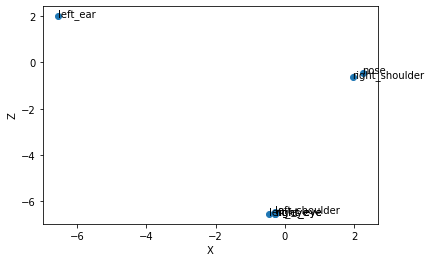

[2.2203706204891205, -0.5044978111982346, -0.31346850097179413, -6.5327149629592896, -0.31346850097179413, -0.30674705281853676, 1.9243668019771576]
[-0.5044978111982346, -6.530926823616028, -6.5327149629592896, 1.9694595038890839, -6.5327149629592896, -6.436047554016113, -0.6641317158937454]


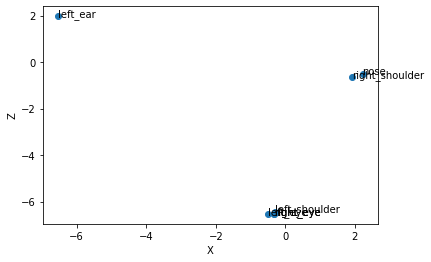

[2.1072199940681458, -0.6146735697984695, -0.43641336262226105, -6.554199457168579, -0.43641336262226105, -0.4300554469227791, 1.8138128519058228]
[-0.6146735697984695, -6.552755236625671, -6.554199457168579, 1.8604891002178192, -6.554199457168579, -6.454247832298279, -0.7750774919986725]


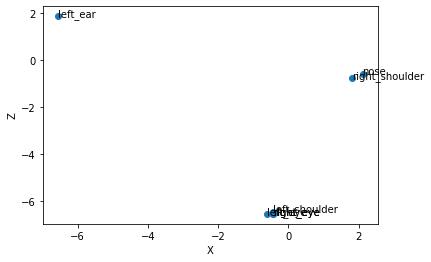

[1.9580648839473724, -1.014137864112854, -0.8817858994007111, -6.553856730461121, -0.8817858994007111, -0.8759859949350357, 1.6819919645786285]
[-1.014137864112854, -6.552522778511047, -6.553856730461121, 1.7316216230392456, -6.553856730461121, -6.453996300697327, -1.204756423830986]


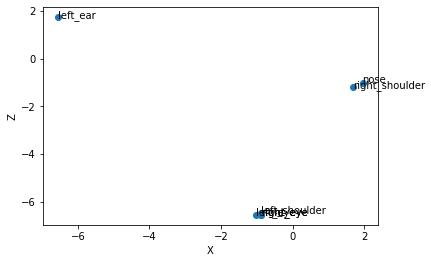

[1.872735321521759, -1.2368276715278625, -1.1328375339508057, -6.4435988664627075, -1.1328375339508057, -1.12624853849411, 1.653778851032257]
[-1.2368276715278625, -6.443078517913818, -6.4435988664627075, 1.6690914332866669, -6.4435988664627075, -6.344844102859497, -1.4594422280788422]


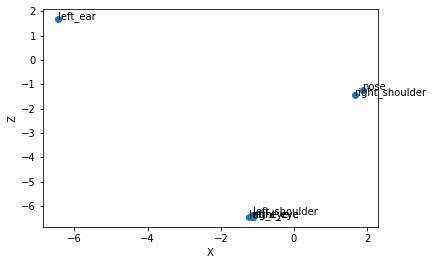

[1.8919292092323303, -1.228649690747261, -1.1303145438432693, -6.419612169265747, -1.1303145438432693, -1.124236360192299, 1.7545723915100098]
[-1.228649690747261, -6.418962478637695, -6.419612169265747, 1.755477637052536, -6.419612169265747, -6.3287317752838135, -1.4498691260814667]


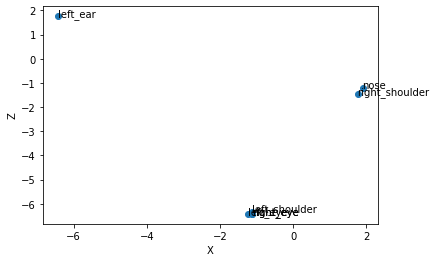

[1.93159818649292, -1.1600825935602188, -1.0701540857553482, -6.438643932342529, -1.0701540857553482, -1.0639770328998566, 1.8004313111305237]
[-1.1600825935602188, -6.438280344009399, -6.438643932342529, 1.7831628024578094, -6.438643932342529, -6.350456476211548, -1.4006799459457397]


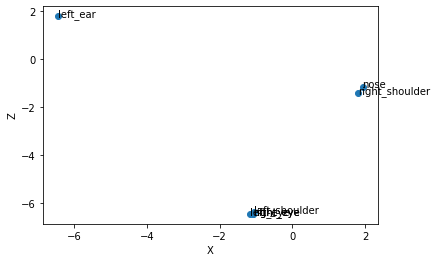

[1.9410675764083862, -1.131707951426506, -1.0314755141735077, -6.433783769607544, -1.0314755141735077, -1.0251842439174652, 1.802191585302353]
[-1.131707951426506, -6.433231234550476, -6.433783769607544, 1.785697191953659, -6.433783769607544, -6.347782015800476, -1.3609924912452698]


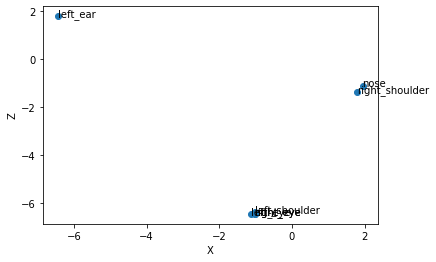

[1.9071310758590698, -1.1158887296915054, -1.0168476402759552, -6.444264054298401, -1.0168476402759552, -1.0119563341140747, 1.7523562908172607]
[-1.1158887296915054, -6.443763971328735, -6.444264054298401, 1.7118710279464722, -6.444264054298401, -6.360728740692139, -1.3551196455955505]


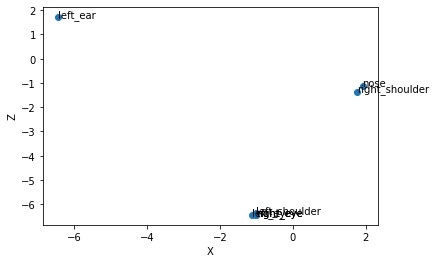

[1.9108670949935913, -0.4154974967241287, -0.31879816204309464, -6.468823552131653, -0.31879816204309464, -0.308960173279047, 1.7635804414749146]
[-0.4154974967241287, -6.468215584754944, -6.468823552131653, 1.7186056077480316, -6.468823552131653, -6.381545066833496, -0.6439606100320816]


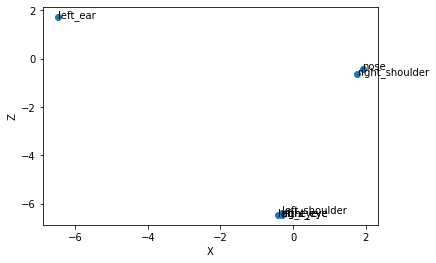

[1.93629652261734, 0.02944094128906727, 0.14062363654375076, -6.501168608665466, 0.14062363654375076, 0.152837997302413, 1.7984335124492645]
[0.02944094128906727, -6.500518321990967, -6.501168608665466, 1.732717603445053, -6.501168608665466, -6.410825848579407, -0.18109962344169617]


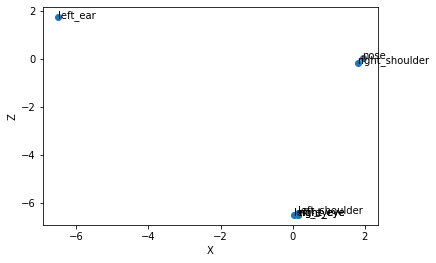

[1.9833384454250336, 0.36031879484653473, 0.47164153307676315, -6.532657742500305, 0.47164153307676315, 0.4846915602684021, 1.8478599190711975]
[0.36031879484653473, -6.532083749771118, -6.532657742500305, 1.7600910365581512, -6.532657742500305, -6.437077522277832, 0.15012096613645554]


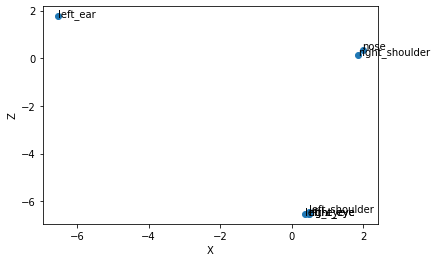

[1.970582753419876, 0.29526008293032646, 0.40494125336408615, -6.532348394393921, 0.40494125336408615, 0.41816554963588715, 1.8281671404838562]
[0.29526008293032646, -6.531791687011719, -6.532348394393921, 1.7382901906967163, -6.532348394393921, -6.436789631843567, 0.08040091022849083]


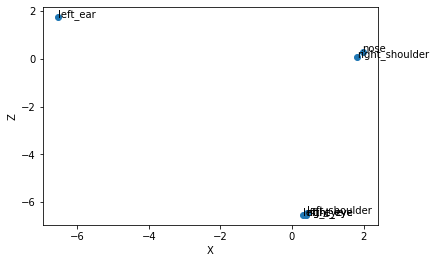

[1.8715333938598633, 0.16399482265114784, 0.2694423496723175, -6.5431809425354, 0.2694423496723175, 0.2822987921535969, 1.7030185461044312]
[0.16399482265114784, -6.5427374839782715, -6.5431809425354, 1.6164155304431915, -6.5431809425354, -6.445985436439514, -0.05434381775557995]


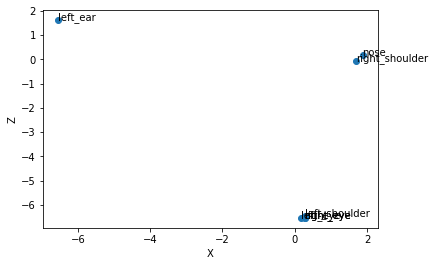

[1.780921071767807, 0.05055619869381189, 0.15546045266091824, -6.5626901388168335, 0.15546045266091824, 0.16759919002652168, 1.5939456224441528]
[0.05055619869381189, -6.562135219573975, -6.5626901388168335, 1.5137816965579987, -6.5626901388168335, -6.463950872421265, -0.16763679683208466]


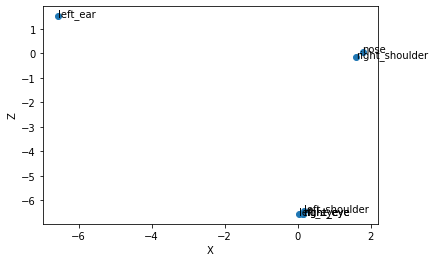

[1.7768549919128418, -0.8673969656229019, -0.7890167832374573, -6.526620984077454, -0.7890167832374573, -0.775117501616478, 1.579749584197998]
[-0.8673969656229019, -6.525953412055969, -6.526620984077454, 1.5149271488189697, -6.526620984077454, -6.427066326141357, -1.102742776274681]


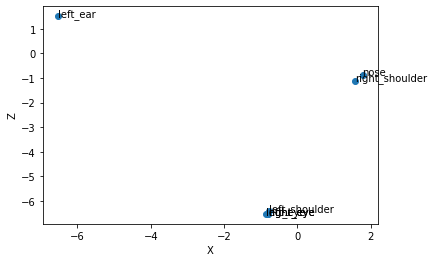

[1.742120385169983, -1.3871563971042633, -1.2901629507541656, -6.361733675003052, -1.2901629507541656, -1.2775249779224396, 1.5355023741722107]
[-1.3871563971042633, -6.360232830047607, -6.361733675003052, 1.4925895631313324, -6.361733675003052, -6.256570816040039, -1.6135227680206299]


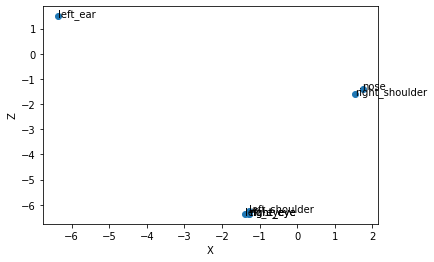

[1.7010422050952911, -1.1085842549800873, -1.012900471687317, -6.367121934890747, -1.012900471687317, -1.0013818740844727, 1.51922807097435]
[-1.1085842549800873, -6.365703344345093, -6.367121934890747, 1.4852066338062286, -6.367121934890747, -6.266173720359802, -1.3330627977848053]


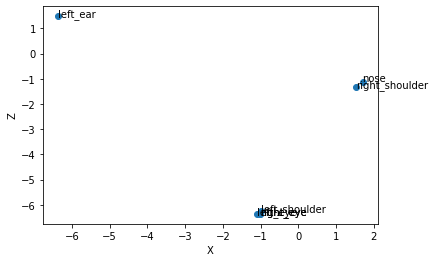

[1.7137397825717926, -1.0363439470529556, -0.9447804838418961, -6.3736361265182495, -0.9447804838418961, -0.9357571601867676, 1.5323932468891144]
[-1.0363439470529556, -6.37227475643158, -6.3736361265182495, 1.4951902627944946, -6.3736361265182495, -6.2751710414886475, -1.2623770534992218]


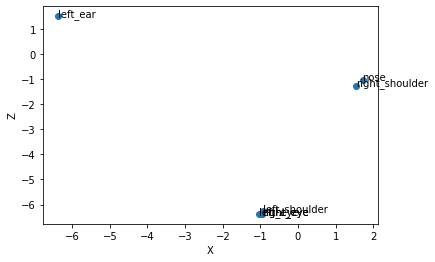

[1.721196323633194, -0.9802683442831039, -0.8855970203876495, -6.373330354690552, -0.8855970203876495, -0.877406895160675, 1.5378133952617645]
[-0.9802683442831039, -6.372244954109192, -6.373330354690552, 1.5049205720424652, -6.373330354690552, -6.276981830596924, -1.2098105996847153]


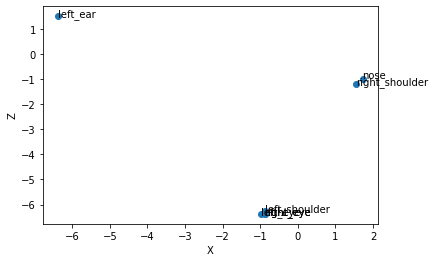

[1.7262382805347443, -0.9516558796167374, -0.8543677628040314, -6.484728455543518, -0.8543677628040314, -0.8466022461652756, 1.5293292701244354]
[-0.9516558796167374, -6.48245632648468, -6.484728455543518, 1.5115541219711304, -6.484728455543518, -6.3950419425964355, -1.176014319062233]


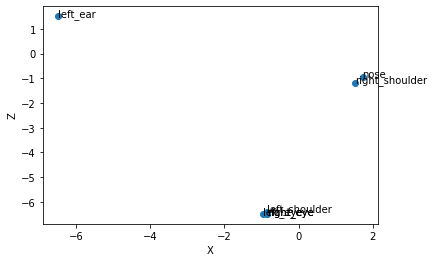

[1.731937825679779, -0.8547961711883545, -0.7240569591522217, -6.510106325149536, -0.7240569591522217, -0.7181505113840103, 1.517106294631958]
[-0.8547961711883545, -6.50769829750061, -6.510106325149536, 1.5145644545555115, -6.510106325149536, -6.415313482284546, -1.0471832752227783]


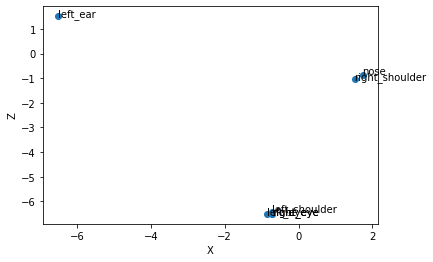

[1.7426744103431702, -0.8115490525960922, -0.6585203856229782, -6.511513590812683, -0.6585203856229782, -0.6533637642860413, 1.5208373963832855]
[-0.8115490525960922, -6.509203910827637, -6.511513590812683, 1.519482135772705, -6.511513590812683, -6.415086984634399, -0.9833206981420517]


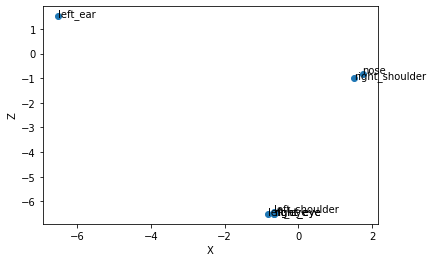

[1.8358427286148071, -0.8360784500837326, -0.6795484572649002, -6.573305130004883, -0.6795484572649002, -0.6739093363285065, 1.574842929840088]
[-0.8360784500837326, -6.570868492126465, -6.573305130004883, 1.6065317392349243, -6.573305130004883, -6.4710235595703125, -1.0021668672561646]


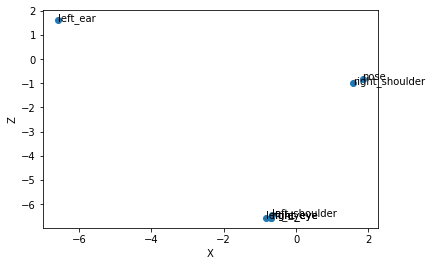

[1.905982792377472, -0.8504149317741394, -0.6919297575950623, -6.606274247169495, -0.6919297575950623, -0.6857500225305557, 1.6255435347557068]
[-0.8504149317741394, -6.6036903858184814, -6.606274247169495, 1.6744662821292877, -6.606274247169495, -6.505957245826721, -1.0121425241231918]


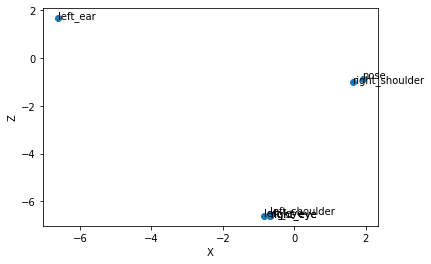

[1.9421614706516266, -0.839148536324501, -0.6709129363298416, -6.6258543729782104, -0.6709129363298416, -0.6642898917198181, 1.6525650024414062]
[-0.839148536324501, -6.623347997665405, -6.6258543729782104, 1.7082403600215912, -6.6258543729782104, -6.5266358852386475, -0.9917120635509491]


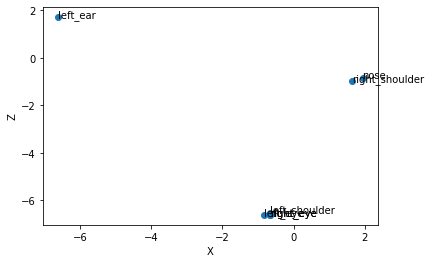

[1.9419236481189728, -0.842873677611351, -0.6758292019367218, -6.649346351623535, -0.6758292019367218, -0.6688863039016724, 1.6520483791828156]
[-0.842873677611351, -6.647129058837891, -6.649346351623535, 1.7059239745140076, -6.649346351623535, -6.550170183181763, -0.9970073401927948]


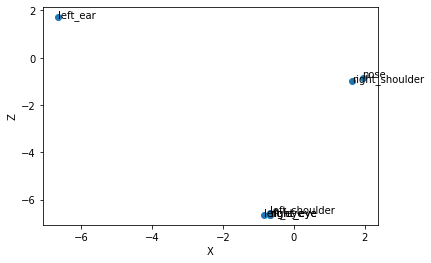

[1.9173456728458405, -0.8283797651529312, -0.6607278436422348, -6.646084189414978, -0.6607278436422348, -0.6536529213190079, 1.6131074726581573]
[-0.8283797651529312, -6.64405882358551, -6.646084189414978, 1.6611352562904358, -6.646084189414978, -6.546375155448914, -0.9867363423109055]


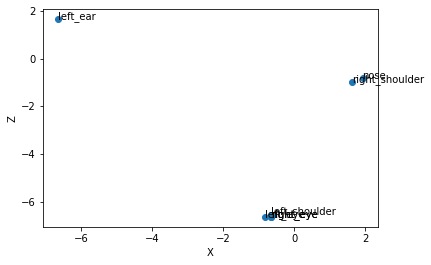

[1.9025230407714844, -0.8798884600400925, -0.7209307700395584, -6.6456687450408936, -0.7209307700395584, -0.7140351831912994, 1.59794420003891]
[-0.8798884600400925, -6.643845438957214, -6.6456687450408936, 1.6466154158115387, -6.6456687450408936, -6.5448373556137085, -1.0435079038143158]


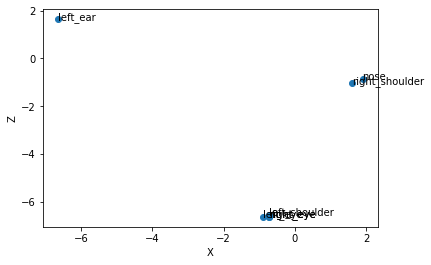

[1.8901892006397247, -0.9165126830339432, -0.7699467241764069, -6.662666201591492, -0.7699467241764069, -0.7632139325141907, 1.588292121887207]
[-0.9165126830339432, -6.66114866733551, -6.662666201591492, 1.6385871171951294, -6.662666201591492, -6.561669111251831, -1.0892488062381744]


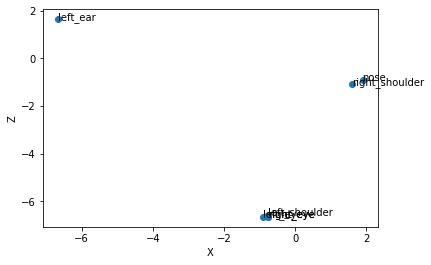

[1.8190258741378784, -1.1770273745059967, -1.080506071448326, -6.67532205581665, -1.080506071448326, -1.0726280510425568, 1.5370024740695953]
[-1.1770273745059967, -6.674219369888306, -6.67532205581665, 1.5844783186912537, -6.67532205581665, -6.579310297966003, -1.3896745443344116]


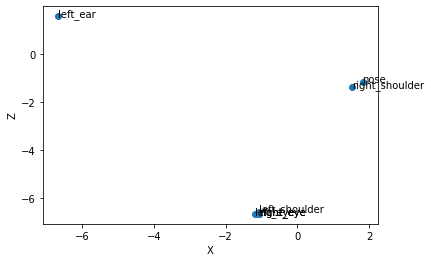

[1.8285088241100311, -1.3050185143947601, -1.223439797759056, -6.617087125778198, -1.223439797759056, -1.2163199484348297, 1.5849344432353973]
[-1.3050185143947601, -6.616379618644714, -6.617087125778198, 1.6229741275310516, -6.617087125778198, -6.529927849769592, -1.529039442539215]


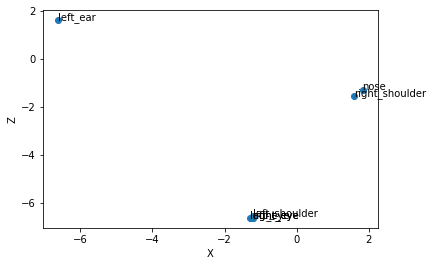

[1.8631620705127716, -1.239427998661995, -1.1478067189455032, -6.5964895486831665, -1.1478067189455032, -1.1407055705785751, 1.6730466485023499]
[-1.239427998661995, -6.595895290374756, -6.5964895486831665, 1.6869466006755829, -6.5964895486831665, -6.511819362640381, -1.4595596492290497]


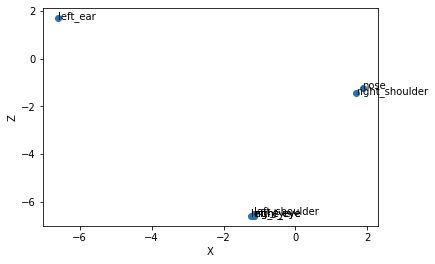

[2.027052193880081, -1.0259737074375153, -0.9362586587667465, -6.547497510910034, -0.9362586587667465, -0.9305590391159058, 1.851956695318222]
[-1.0259737074375153, -6.546832919120789, -6.547497510910034, 1.8574947118759155, -6.547497510910034, -6.4621347188949585, -1.2657162547111511]


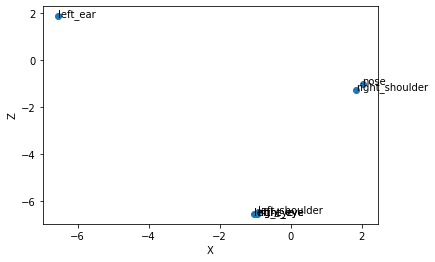

[2.038998454809189, -1.0095375031232834, -0.923774465918541, -6.534369587898254, -0.923774465918541, -0.9165722131729126, 1.8527235090732574]
[-1.0095375031232834, -6.533717513084412, -6.534369587898254, 1.849396824836731, -6.534369587898254, -6.44895613193512, -1.253191977739334]


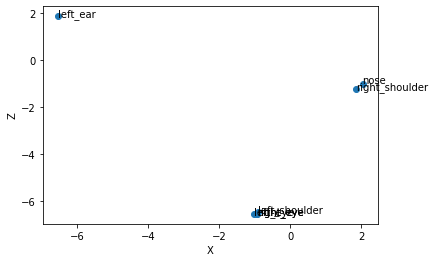

[2.0613491535186768, -1.1253894865512848, -1.0385460406541824, -6.432638764381409, -1.0385460406541824, -1.0283936560153961, 1.8830858170986176]
[-1.1253894865512848, -6.431630849838257, -6.432638764381409, 1.8729935586452484, -6.432638764381409, -6.351653337478638, -1.3580389320850372]


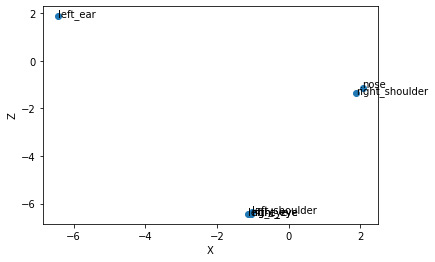

[2.0531636476516724, -0.8983030915260315, -0.8090914785861969, -6.429693698883057, -0.8090914785861969, -0.797453373670578, 1.8719211220741272]
[-0.8983030915260315, -6.428525447845459, -6.429693698883057, 1.8607084453105927, -6.429693698883057, -6.346045732498169, -1.1314692348241806]


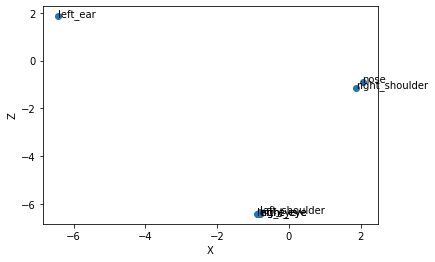

[2.066560536623001, -0.7747296988964081, -0.6721441447734833, -6.435773968696594, -0.6721441447734833, -0.6596288830041885, 1.885121613740921]
[-0.7747296988964081, -6.434643864631653, -6.435773968696594, 1.8663600087165833, -6.435773968696594, -6.3508254289627075, -0.9998992085456848]


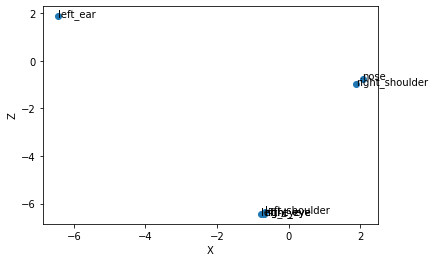

[2.063153237104416, -0.13875778764486313, -0.02197962487116456, -6.480643153190613, -0.02197962487116456, -0.011151760118082166, 1.8797171115875244]
[-0.13875778764486313, -6.479140520095825, -6.480643153190613, 1.8429648876190186, -6.480643153190613, -6.387026906013489, -0.35635266453027725]


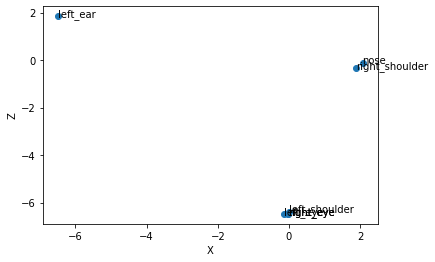

[1.9665463268756866, -0.21294893696904182, -0.10952452197670937, -6.482298970222473, -0.10952452197670937, -0.09765567258000374, 1.7875964939594269]
[-0.21294893696904182, -6.48080050945282, -6.482298970222473, 1.7269501090049744, -6.482298970222473, -6.388448476791382, -0.43943077325820923]


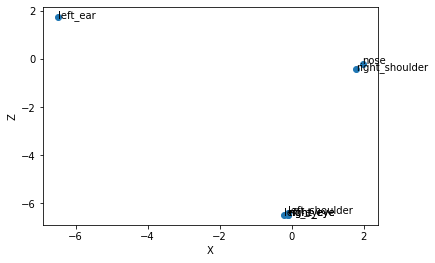

[1.79557204246521, -0.5264707282185555, -0.4359497129917145, -6.46222710609436, -0.4359497129917145, -0.4209810867905617, 1.5933021903038025]
[-0.5264707282185555, -6.460609436035156, -6.46222710609436, 1.5456688404083252, -6.46222710609436, -6.3652002811431885, -0.7640451937913895]


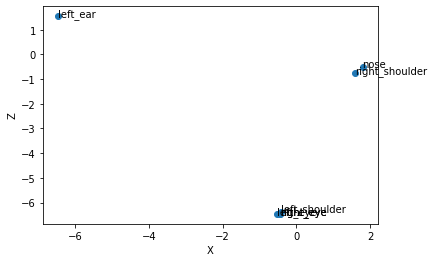

[1.7201225459575653, -1.3157360255718231, -1.2286688387393951, -6.34330153465271, -1.2286688387393951, -1.2131060659885406, 1.5239651501178741]
[-1.3157360255718231, -6.341712474822998, -6.34330153465271, 1.4939051866531372, -6.34330153465271, -6.249294281005859, -1.5431861579418182]


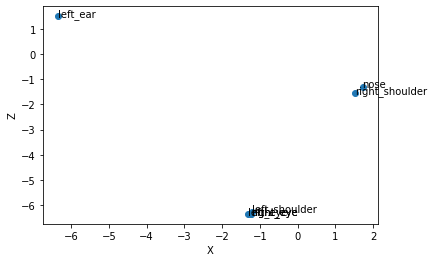

[1.6747547686100006, -1.528472751379013, -1.4380073547363281, -6.265653967857361, -1.4380073547363281, -1.4234980940818787, 1.486404538154602]
[-1.528472751379013, -6.26398503780365, -6.265653967857361, 1.461222916841507, -6.265653967857361, -6.174776554107666, -1.754722148180008]


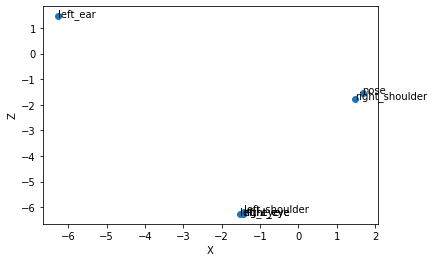

[1.6299428045749664, -1.435171663761139, -1.3408656418323517, -6.273242831230164, -1.3408656418323517, -1.3278025388717651, 1.4373037219047546]
[-1.435171663761139, -6.271417737007141, -6.273242831230164, 1.4164109528064728, -6.273242831230164, -6.180469393730164, -1.6587288677692413]


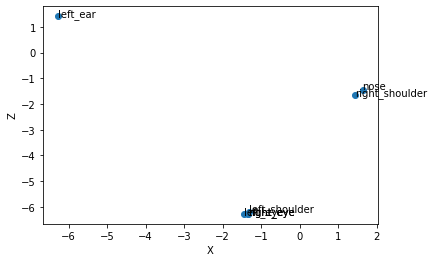

[1.5824337303638458, -1.3529951870441437, -1.265503466129303, -6.251276731491089, -1.265503466129303, -1.2535856664180756, 1.4087003469467163]
[-1.3529951870441437, -6.249219179153442, -6.251276731491089, 1.3949587941169739, -6.251276731491089, -6.164262890815735, -1.580432802438736]


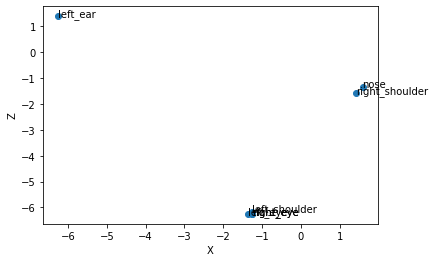

[1.5910373628139496, -1.3425551354885101, -1.2458882480859756, -6.246271729469299, -1.2458882480859756, -1.2301269173622131, 1.423298418521881]
[-1.3425551354885101, -6.244258880615234, -6.246271729469299, 1.4191925525665283, -6.246271729469299, -6.161707639694214, -1.5640771389007568]


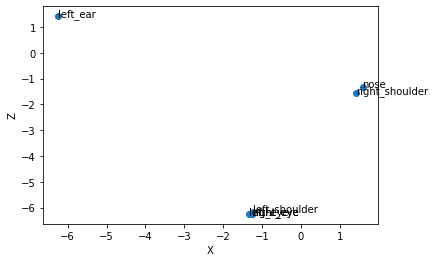

[1.5830691158771515, -1.3099190592765808, -1.2195252627134323, -6.252157688140869, -1.2195252627134323, -1.2071875482797623, 1.4030998945236206]
[-1.3099190592765808, -6.250278353691101, -6.252157688140869, 1.4036262035369873, -6.252157688140869, -6.1684805154800415, -1.5404416620731354]


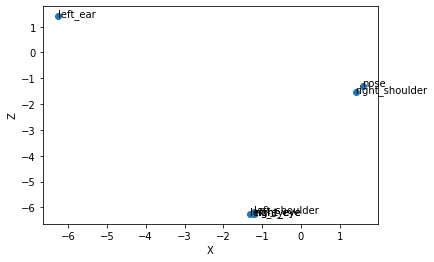

[1.6042165458202362, -1.2829558551311493, -1.1919837445020676, -6.326277256011963, -1.1919837445020676, -1.1794136464595795, 1.4128166437149048]
[-1.2829558551311493, -6.324354410171509, -6.326277256011963, 1.4109310507774353, -6.326277256011963, -6.246551275253296, -1.512039601802826]


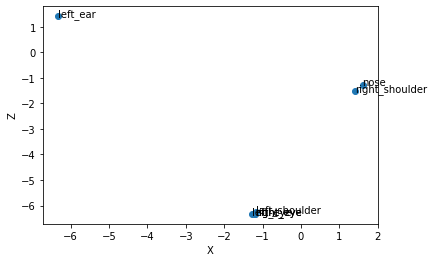

[1.6533146798610687, -1.0025930404663086, -0.8847305178642273, -6.389411687850952, -0.8847305178642273, -0.8765360713005066, 1.4244061708450317]
[-1.0025930404663086, -6.386358141899109, -6.389411687850952, 1.4413313567638397, -6.389411687850952, -6.308691501617432, -1.2143222987651825]


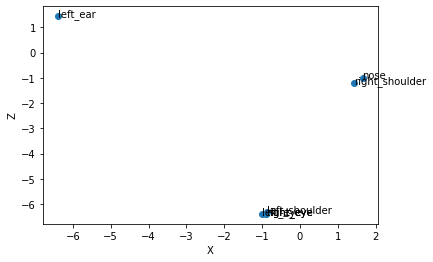

[1.662023514509201, -0.6963792443275452, -0.5601349472999573, -6.456471681594849, -0.5601349472999573, -0.552859790623188, 1.434037685394287]
[-0.6963792443275452, -6.452818512916565, -6.456471681594849, 1.4467988908290863, -6.456471681594849, -6.368685364723206, -0.8880721777677536]


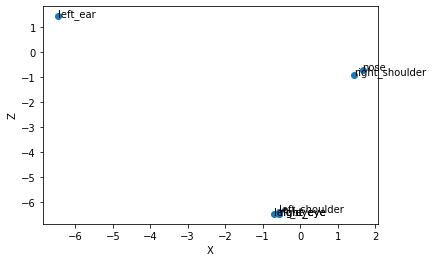

[1.6649502515792847, -0.7441697269678116, -0.6125878542661667, -6.456510424613953, -0.6125878542661667, -0.6051548942923546, 1.4226692914962769]
[-0.7441697269678116, -6.452822685241699, -6.456510424613953, 1.446758508682251, -6.456510424613953, -6.36736273765564, -0.9361705183982849]


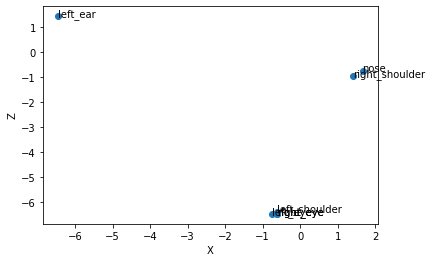

[1.6623567044734955, -0.7969946414232254, -0.6360062211751938, -6.449095010757446, -0.6360062211751938, -0.6294406205415726, 1.4121347665786743]
[-0.7969946414232254, -6.44526481628418, -6.449095010757446, 1.446431428194046, -6.449095010757446, -6.359269618988037, -0.954904705286026]


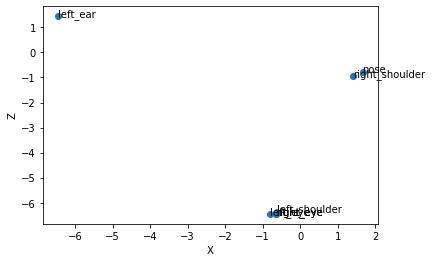

[1.6609223186969757, -0.886022225022316, -0.7142153382301331, -6.448255777359009, -0.7142153382301331, -0.7073715329170227, 1.4053085446357727]
[-0.886022225022316, -6.444568037986755, -6.448255777359009, 1.4454664289951324, -6.448255777359009, -6.358591318130493, -1.0347232967615128]


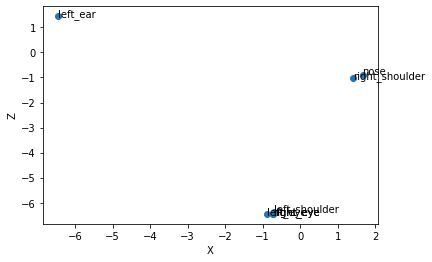

[1.6605406999588013, -0.9316682070493698, -0.7541903108358383, -6.446842551231384, -0.7541903108358383, -0.7471858710050583, 1.4028140902519226]
[-0.9316682070493698, -6.443242430686951, -6.446842551231384, 1.4462436735630035, -6.446842551231384, -6.357325911521912, -1.0753731429576874]


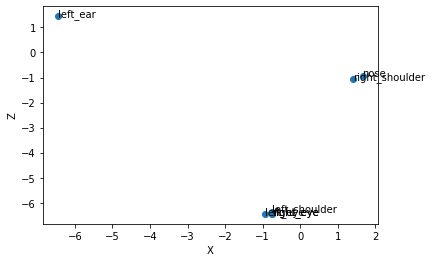

[1.6645415127277374, -0.9351055324077606, -0.764104500412941, -6.4455461502075195, -0.764104500412941, -0.7570052146911621, 1.4039140939712524]
[-0.9351055324077606, -6.441908478736877, -6.4455461502075195, 1.4533381164073944, -6.4455461502075195, -6.355264782905579, -1.08351431787014]


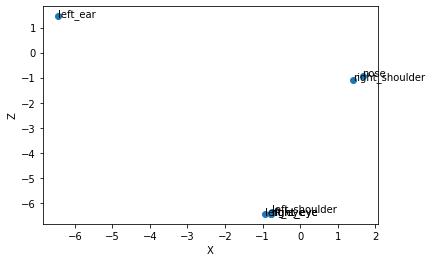

[1.6575244069099426, -0.9329049289226532, -0.7670963555574417, -6.470085978507996, -0.7670963555574417, -0.7596692442893982, 1.387104094028473]
[-0.9329049289226532, -6.466865539550781, -6.470085978507996, 1.439245343208313, -6.470085978507996, -6.374994516372681, -1.0893547534942627]


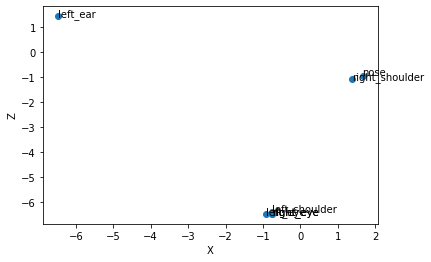

[1.6340605914592743, -0.9351330995559692, -0.7736901938915253, -6.4720964431762695, -0.7736901938915253, -0.7660748064517975, 1.3614878058433533]
[-0.9351330995559692, -6.469129323959351, -6.4720964431762695, 1.4144286513328552, -6.4720964431762695, -6.3766151666641235, -1.0964782536029816]


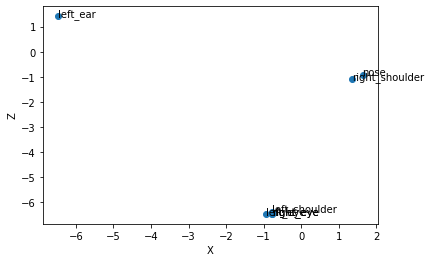

[1.5881077945232391, -1.0521286725997925, -0.8997723460197449, -6.461239457130432, -0.8997723460197449, -0.8917815983295441, 1.3212770223617554]
[-1.0521286725997925, -6.458771228790283, -6.461239457130432, 1.3746894896030426, -6.461239457130432, -6.366791725158691, -1.2204450368881226]


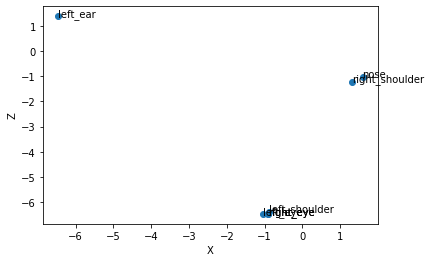

[1.4642110466957092, -1.0399143397808075, -0.8967427909374237, -6.48776113986969, -0.8967427909374237, -0.8886320888996124, 1.2043437361717224]
[-1.0399143397808075, -6.486102342605591, -6.48776113986969, 1.2511248886585236, -6.48776113986969, -6.399978995323181, -1.2146037817001343]


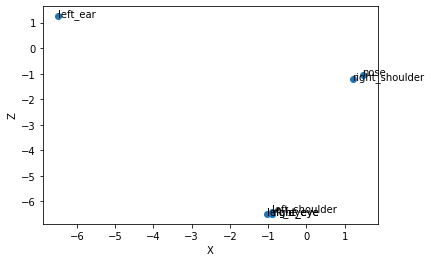

[1.4793306589126587, -1.0960035771131516, -0.9897851198911667, -6.509575843811035, -0.9897851198911667, -0.9811055660247803, 1.2196564674377441]
[-1.0960035771131516, -6.507776379585266, -6.509575843811035, 1.2663549184799194, -6.509575843811035, -6.427335739135742, -1.3082948327064514]


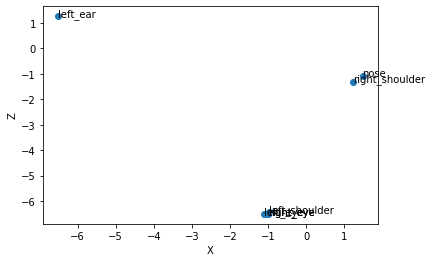

[1.4716626703739166, -1.0882286727428436, -0.9864113479852676, -6.481000781059265, -0.9864113479852676, -0.9775722026824951, 1.2307454645633698]
[-1.0882286727428436, -6.479933857917786, -6.481000781059265, 1.275573968887329, -6.481000781059265, -6.403548717498779, -1.3047780096530914]


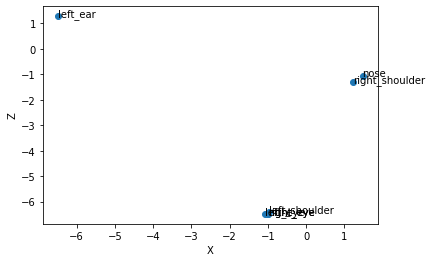

[1.4803004264831543, -0.9736601263284683, -0.8738808333873749, -6.479635834693909, -0.8738808333873749, -0.8651354908943176, 1.2625890970230103]
[-0.9736601263284683, -6.47871732711792, -6.479635834693909, 1.2849386036396027, -6.479635834693909, -6.402624249458313, -1.184850037097931]


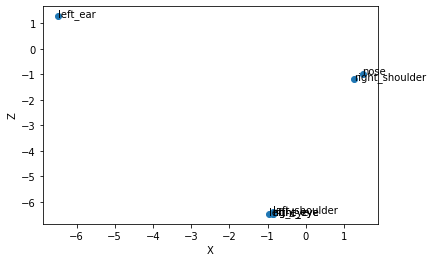

[1.5019556879997253, -0.8493858575820923, -0.7332319021224976, -6.510171890258789, -0.7332319021224976, -0.724690854549408, 1.3280847668647766]
[-0.8493858575820923, -6.50980532169342, -6.510171890258789, 1.3242307305335999, -6.510171890258789, -6.431673765182495, -1.0473702102899551]


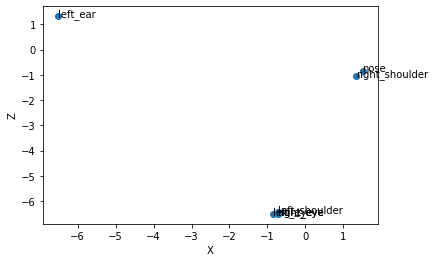

[1.4974415302276611, -1.0335032641887665, -0.9043923020362854, -6.475202441215515, -0.9043923020362854, -0.8953282237052917, 1.3288231194019318]
[-1.0335032641887665, -6.47538959980011, -6.475202441215515, 1.3215543329715729, -6.475202441215515, -6.399086117744446, -1.224176064133644]


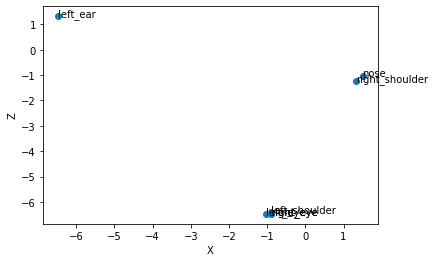

[1.5080834925174713, -0.9658224880695343, -0.839918851852417, -6.42426609992981, -0.839918851852417, -0.8312035351991653, 1.375230848789215]
[-0.9658224880695343, -6.424349546432495, -6.42426609992981, 1.337927132844925, -6.42426609992981, -6.358350515365601, -1.1637968569993973]


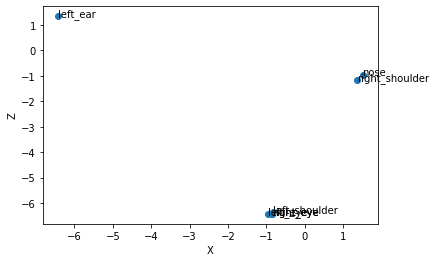

[1.5903924405574799, -0.8733667433261871, -0.7542217522859573, -6.421994566917419, -0.7542217522859573, -0.7458887249231339, 1.4847929775714874]
[-0.8733667433261871, -6.422019004821777, -6.421994566917419, 1.4150755107402802, -6.421994566917419, -6.357577443122864, -1.0767167806625366]


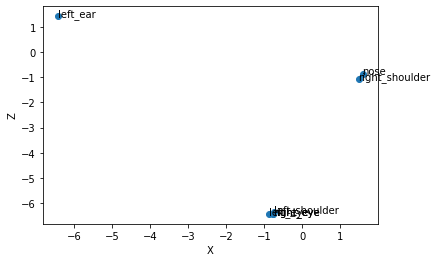

[1.6865132749080658, -0.7720259577035904, -0.6518872082233429, -6.409940123558044, -0.6518872082233429, -0.6437010318040848, 1.5897402167320251]
[-0.7720259577035904, -6.409967541694641, -6.409940123558044, 1.509818583726883, -6.409940123558044, -6.347886919975281, -0.9772231429815292]


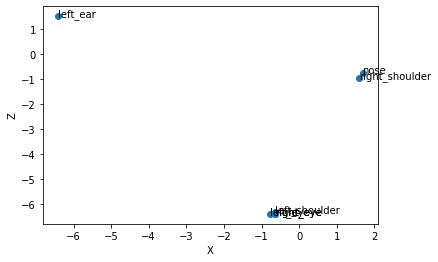

[1.7445343732833862, -0.6891131401062012, -0.5664390325546265, -6.394362449645996, -0.5664390325546265, -0.5579901486635208, 1.6472962498664856]
[-0.6891131401062012, -6.394397616386414, -6.394362449645996, 1.5678887069225311, -6.394362449645996, -6.334753036499023, -0.8929765969514847]


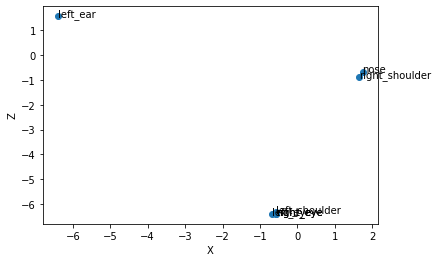

[1.7402125895023346, -0.5854292213916779, -0.4605460539460182, -6.377518177032471, -0.4605460539460182, -0.4523812606930733, 1.6389138996601105]
[-0.5854292213916779, -6.377643942832947, -6.377518177032471, 1.5635642409324646, -6.377518177032471, -6.320706009864807, -0.7870195060968399]


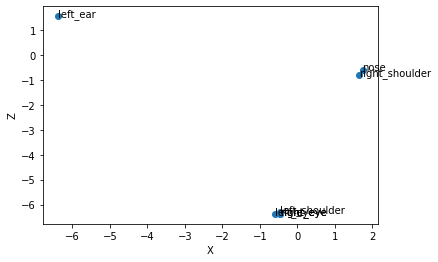

[1.7502766847610474, -0.5703095719218254, -0.44699277728796005, -6.3626182079315186, -0.44699277728796005, -0.4388616234064102, 1.648550033569336]
[-0.5703095719218254, -6.362816095352173, -6.3626182079315186, 1.5730886161327362, -6.3626182079315186, -6.306633353233337, -0.7747215777635574]


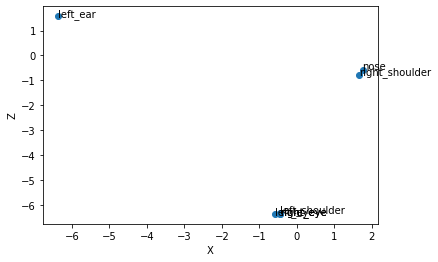

[1.746365875005722, -0.5842344090342522, -0.4590778425335884, -6.345407962799072, -0.4590778425335884, -0.4509783536195755, 1.642148196697235]
[-0.5842344090342522, -6.345649361610413, -6.345407962799072, 1.5701675415039062, -6.345407962799072, -6.289778351783752, -0.7883133739233017]


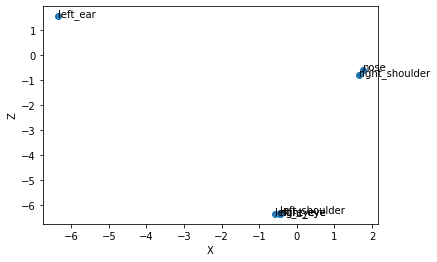

[1.746828556060791, -0.603632815182209, -0.4763958230614662, -6.349084973335266, -0.4763958230614662, -0.4678799957036972, 1.6411197185516357]
[-0.603632815182209, -6.349409818649292, -6.349084973335266, 1.5723590552806854, -6.349084973335266, -6.292784810066223, -0.8122022449970245]


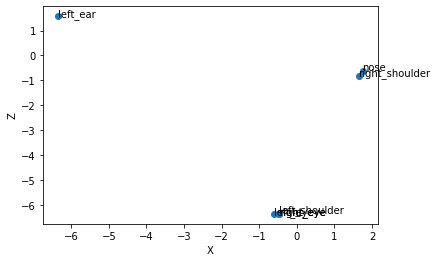

[1.7437633872032166, -0.8753824979066849, -0.7400687038898468, -6.339820027351379, -0.7400687038898468, -0.7313410192728043, 1.6379651427268982]
[-0.8753824979066849, -6.340200304985046, -6.339820027351379, 1.569741666316986, -6.339820027351379, -6.280388236045837, -1.0740143805742264]


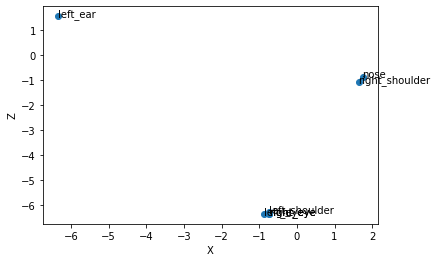

[1.7227225005626678, -0.9407500177621841, -0.8022140711545944, -6.346136927604675, -0.8022140711545944, -0.7934670895338058, 1.6086259484291077]
[-0.9407500177621841, -6.346448063850403, -6.346136927604675, 1.5539069473743439, -6.346136927604675, -6.283296346664429, -1.1286171525716782]


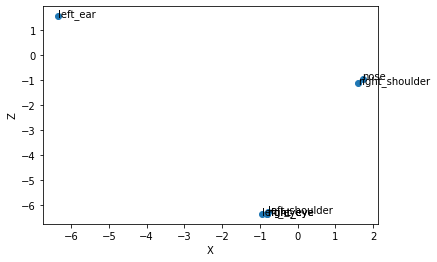

[1.7324736714363098, -0.8678737282752991, -0.7243350893259048, -6.396987438201904, -0.7243350893259048, -0.7163958996534348, 1.6123764216899872]
[-0.8678737282752991, -6.397250294685364, -6.396987438201904, 1.5739195048809052, -6.396987438201904, -6.326747536659241, -1.0401175916194916]


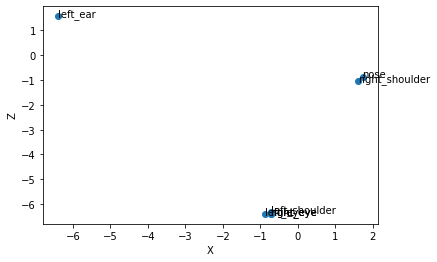

[1.741371750831604, -0.8694232255220413, -0.7301107048988342, -6.396723389625549, -0.7301107048988342, -0.7224324345588684, 1.6210351884365082]
[-0.8694232255220413, -6.396960020065308, -6.396723389625549, 1.599903553724289, -6.396723389625549, -6.326534152030945, -1.0429509729146957]


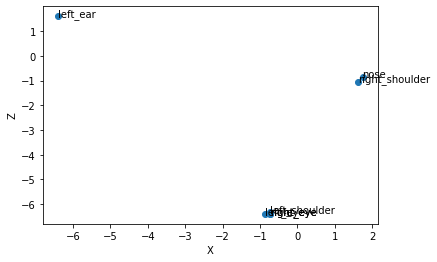

[1.7348037660121918, -0.8677546679973602, -0.7297654449939728, -6.399180889129639, -0.7297654449939728, -0.7221844792366028, 1.611977368593216]
[-0.8677546679973602, -6.399336457252502, -6.399180889129639, 1.5985260903835297, -6.399180889129639, -6.330140829086304, -1.0416554659605026]


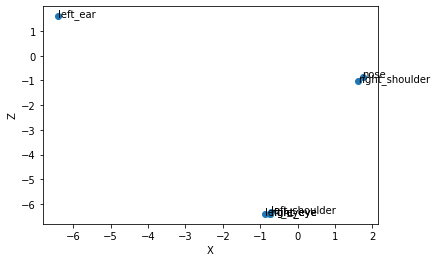

[1.7256498336791992, -0.8874087035655975, -0.7533030956983566, -6.399556994438171, -0.7533030956983566, -0.7459995150566101, 1.5980812907218933]
[-0.8874087035655975, -6.3996922969818115, -6.399556994438171, 1.5940381586551666, -6.399556994438171, -6.33098840713501, -1.0593772679567337]


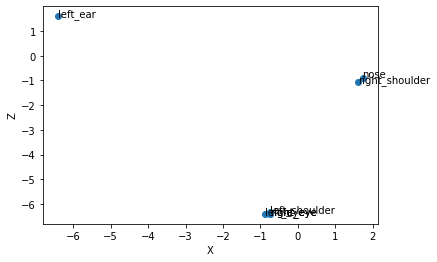

[1.7271222174167633, -0.8913248777389526, -0.7579251378774643, -6.407404541969299, -0.7579251378774643, -0.7507668435573578, 1.5971753001213074]
[-0.8913248777389526, -6.407594680786133, -6.407404541969299, 1.5927425026893616, -6.407404541969299, -6.33827805519104, -1.0648714005947113]


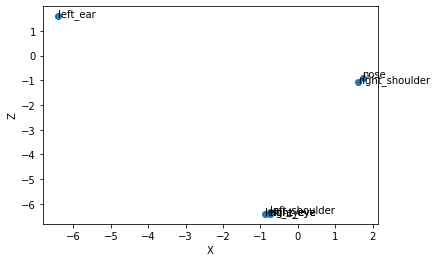

[1.72612726688385, -0.9081614762544632, -0.7763268798589706, -6.413078308105469, -0.7763268798589706, -0.7693063467741013, 1.586618423461914]
[-0.9081614762544632, -6.413315534591675, -6.413078308105469, 1.5866142511367798, -6.413078308105469, -6.342967748641968, -1.0859828442335129]


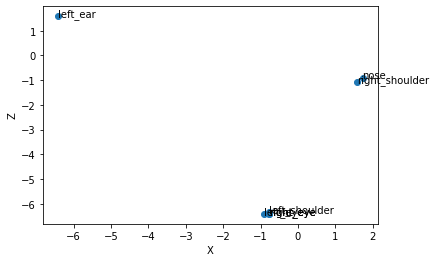

[1.7255914211273193, -0.946730226278305, -0.8197293430566788, -6.418979167938232, -0.8197293430566788, -0.8126745373010635, 1.5805332362651825]
[-0.946730226278305, -6.419190764427185, -6.418979167938232, 1.5830409526824951, -6.418979167938232, -6.348288655281067, -1.131228655576706]


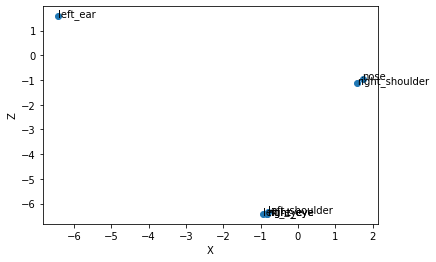

[1.7262381315231323, -0.9703189879655838, -0.8454351127147675, -6.430190801620483, -0.8454351127147675, -0.8383642137050629, 1.5769879519939423]
[-0.9703189879655838, -6.430449485778809, -6.430190801620483, 1.5806303918361664, -6.430190801620483, -6.357802748680115, -1.1589372158050537]


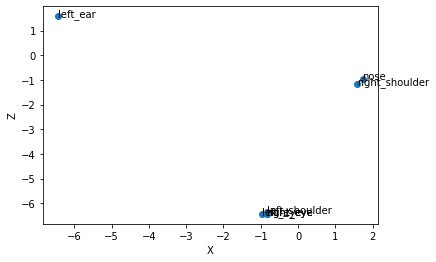

[1.7267529666423798, -0.9822991490364075, -0.8594856411218643, -6.456679105758667, -0.8594856411218643, -0.8523835986852646, 1.5729504823684692]
[-0.9822991490364075, -6.456902623176575, -6.456679105758667, 1.577073484659195, -6.456679105758667, -6.381838321685791, -1.1751539260149002]


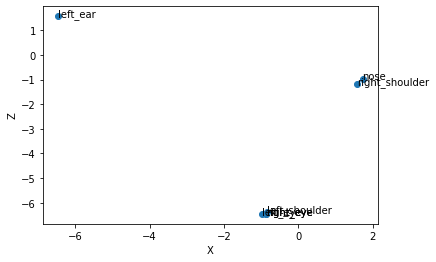

[1.7280004918575287, -1.0059595108032227, -0.8854597806930542, -6.4587730169296265, -0.8854597806930542, -0.8782301843166351, 1.5721118450164795]
[-1.0059595108032227, -6.458904147148132, -6.4587730169296265, 1.576198786497116, -6.4587730169296265, -6.3839030265808105, -1.2021520733833313]


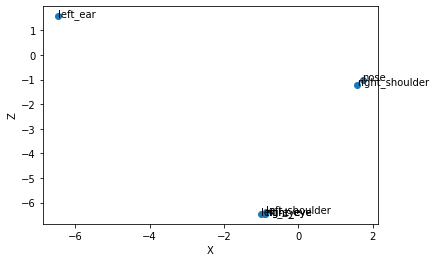

[1.7285050451755524, -1.0380712151527405, -0.9201718121767044, -6.453741788864136, -0.9201718121767044, -0.9128590673208237, 1.5715083479881287]
[-1.0380712151527405, -6.453694701194763, -6.453741788864136, 1.5752197802066803, -6.453741788864136, -6.379176378250122, -1.2358271330595016]


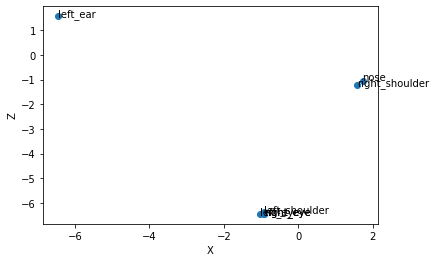

[1.7227433621883392, -1.0839829593896866, -0.969369038939476, -6.433590054512024, -0.969369038939476, -0.9620996564626694, 1.5610280632972717]
[-1.0839829593896866, -6.433323621749878, -6.433590054512024, 1.5678596496582031, -6.433590054512024, -6.3615405559539795, -1.2830480933189392]


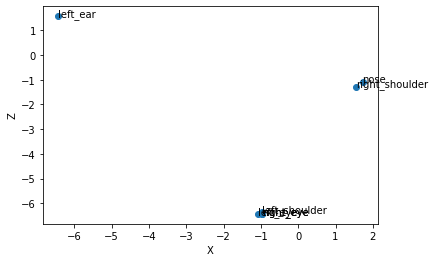

In [66]:
for k in range(138):
    side_view = point_normalize_dataframe.loc[k]
    check_angle_side_x = []
    check_angle_side_z = []

    plot_for_point = [nose, left_eye, right_eye, left_ear, right_eye, left_shoulder, right_shoulder]

    for i in plot_for_point:
        #print(i)
    
        check_angle_side_x.append(side_view[i] * 10)
        check_angle_side_z.append(side_view[i+2] * 10)
    print(check_angle_side_x)
    print(check_angle_side_z)

    plt.scatter(check_angle_side_x, check_angle_side_z)
    
    idx = 0

    for i in plot_for_point:
        name = landmark_names[i]
        plt.xlabel("X")
        plt.ylabel("Z")
        plt.text(check_angle_side_x[idx], check_angle_side_z[idx], name, fontdict={"size" : 10})
        idx = idx + 1
    plt.show()

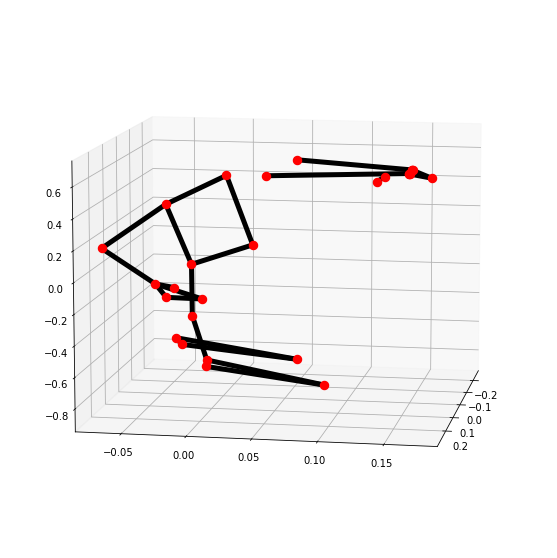

In [55]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)